<div style = "text-align: center"><font size = 5.5 color = "#B22222" face = "verdana"><b>Groundwater level prediction</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "black" face = "verdana"><b>Well: Dinajpur-57(Dinajpur Sadar)</b></font></div>
<br/> 
<br/> 
<div style = "text-align: center"><font size = 4 color = "#00008B" face = "verdana"><b>Md.Abdullah-Al Mamun</b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Master's Programme in Data Science</b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Tampere University, Finland.</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "#00008B" face = "verdana"><b>Mst. Nazneen Aktar</b></font></div>
</font></div><div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>B.Sc. in Disaster Management </b></font></div> 
<div style = "text-align: center"><font size = 3 color = "black" face = "verdana"><b>Begum Rokeya University, Rangpur, Bangladesh.</b></font>

# 1. Introduction

## About the dataset


Data was collected from meteorological stations in Rangpur, Saidpur, and Dinajpur through multiple sources, including the Bangladesh Meteorological Department (BMD), Bangladesh Water Development Board (BWDB), Food and Agricultural Organization (FAO), National Oceanic and Atmospheric Association (NOAA) Climate Prediction Center (CPC), Bangladesh Bureau of Statistics, and National Aeronautics and Space Administration (NASA). Additionally, monthly groundwater level (GWL) data for 12 selected wells was acquired from the Bangladesh Water Development Board (BWDB). The MODIS data was initially in Network Common Data Form (NetCDF) format and was subsequently converted to Excel format. This extensive dataset encompasses the period from 1993 to 2017.

We collected groundwater level data from three wells in the Rangpur district, and five wells in the Dinajpur district from the Bangladesh Water Development Board (BWDB). Groundwater level data collected daily(for particular dates in a month). However, groundwater level data, temperature data, and rainfall data are specific to their respective geographic areas, while the remaining data is common to all 8 wells' groundwater levels. We have predicted groundwater levels for each well sepeartly using various machine learning models, hyperparameter tuning, and hybrid modeling techniques. Finally, we have visualized our findings. 


## Data: 

**1.Groundwater Level (m)**
- GWL_Dinajpur-57

**2. Temperature (°C)**
- Dinajpur_Tave

**3. Rainfall (mm)**
- Dinajpur_PRCP

**4. MODIS Normalized Difference Vegetation Index (NDVI)**
- Dinajpur_NDVI

**5. Indian Ocean Dipole (IOD)**
- IOD
    
**6. Southern Oscillation Index (SOI)**
- SOI
    
**7. Nina3.4 Value**
- Nina3.4
    
**8. MEI Value**
- MEI



#### Note: 

1. We transformed monthly data into daily values, assuming they represent monthly averages. Due to a small dataset of only 300 rows, we applied a technique to treat it as daily data. After preprocessing, we obtained 9131 rows. Additionally, we normalized the data to maintain consistent scales, crucial for effective machine learning modelling.

2. Converting to daily values and normalizing aims to provide a solid foundation for accurate machine learning predictions and analyses. This preprocessing step enhances the reliability and performance of our models.


## Identifying the Features and Targets

### Features (Independent Variables):

1. Dinajpur_Tave
2. Dinajpur_PRCP
3. Dinajpur_NDVI
4. IOD
5. SOI
6. Nina3.4
7. MEI

### Target (Dependent Variable):

1.  GWL_Dinajpur-57

## Libraries

In [1]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from scipy import stats
from tbats import TBATS
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from skopt.space import Integer, Real
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.exceptions import ConvergenceWarning
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="skopt.optimizer.optimizer")
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

### Loading dataset...

In [2]:
df = pd.read_excel(r'final_data_Dinajpur_57.xlsx')
df

,Date,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI,GWL_Dinajpur-57
0,01.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.322000
1,02.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.322000
2,03.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.322000
3,04.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.322000
4,05.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.322000
...,...,...,...,...,...,...,...,...,...
9126,27.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,7.326667
9127,28.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,7.326667
9128,29.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,7.326667
9129,30.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,7.326667


In [3]:
df.columns

Index(['Date', 'Dinajpur_Tave', 'Dinajpur_PRCP', 'Dinajpur_NDVI', 'IOD', 'SOI',
       'Nina3.4', 'MEI', 'GWL_Dinajpur-57'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             9131 non-null   object 
 1   Dinajpur_Tave    9131 non-null   float64
 2   Dinajpur_PRCP    9131 non-null   int64  
 3   Dinajpur_NDVI    9131 non-null   float64
 4   IOD              9131 non-null   float64
 5   SOI              9131 non-null   float64
 6   Nina3.4          9131 non-null   float64
 7   MEI              9131 non-null   float64
 8   GWL_Dinajpur-57  9131 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 642.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,9131.0,26.316318,11.841618,13.20000,22.300000,27.300000,29.000000,213.200000
Dinajpur_PRCP,9131.0,162.677363,193.538334,0.00000,3.000000,74.000000,285.000000,1026.000000
Dinajpur_NDVI,9131.0,0.217515,0.082181,0.06320,0.152000,0.199900,0.271600,0.445800
IOD,9131.0,0.004448,0.344990,-0.88667,-0.203742,-0.023450,0.207985,1.472656
SOI,9131.0,-0.491052,10.714015,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4,9131.0,0.007095,0.870827,-1.79000,-0.560000,-0.080000,0.480000,2.570000
MEI,9131.0,-0.005756,1.035444,-1.96400,-0.771000,-0.225000,0.612500,3.214000
GWL_Dinajpur-57,9131.0,6.128481,1.529422,2.41750,4.906667,6.043333,7.326667,9.310000


In [6]:
df["GWL_Dinajpur-57"].describe()

count    9131.000000
mean        6.128481
std         1.529422
min         2.417500
25%         4.906667
50%         6.043333
75%         7.326667
max         9.310000
Name: GWL_Dinajpur-57, dtype: float64

In [7]:
cols_to_convert = df.columns.difference(['Date'])
df[cols_to_convert] = df[cols_to_convert].astype(float)

# 2. Data Exploration and Analysis
## Visualizing the distribution


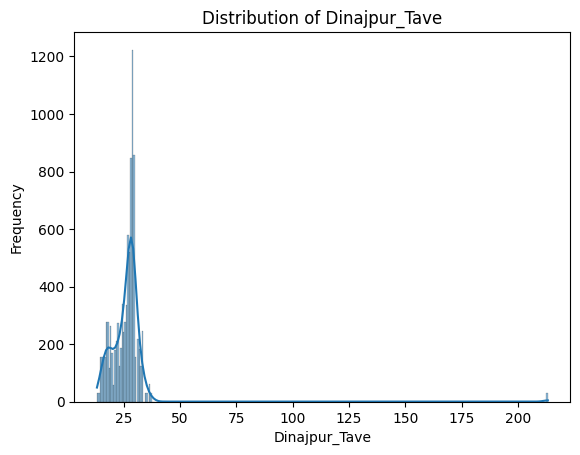

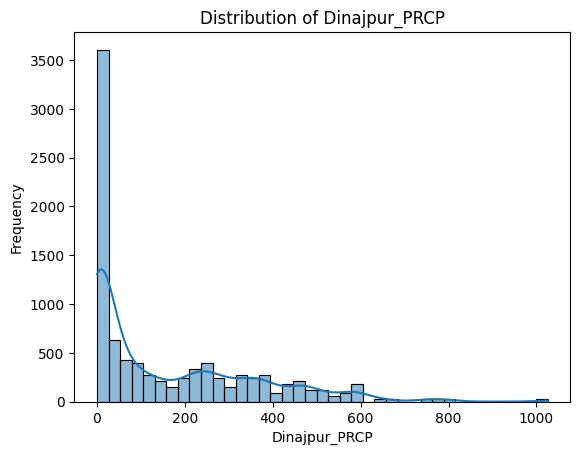

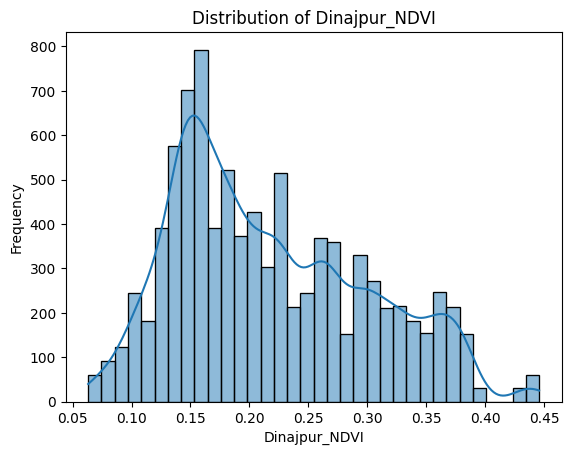

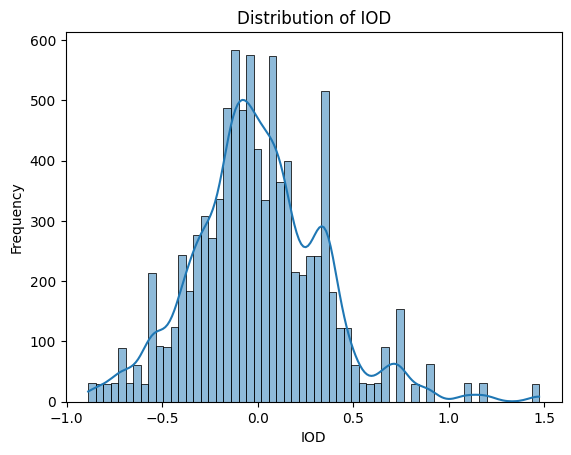

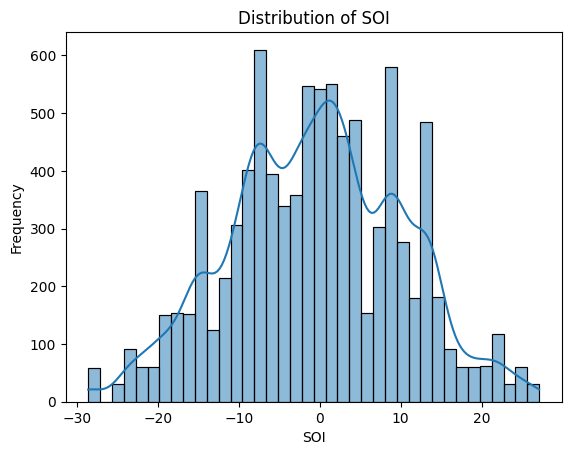

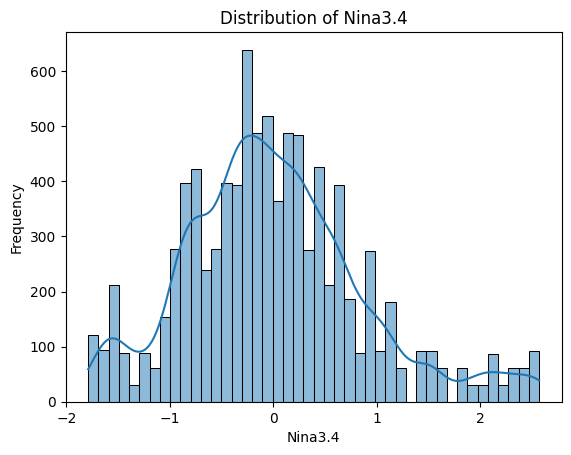

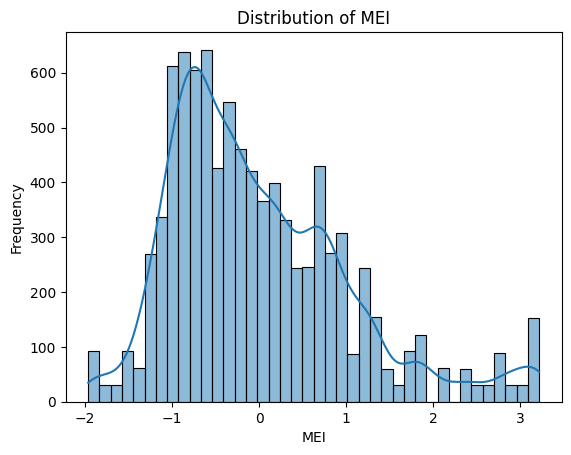

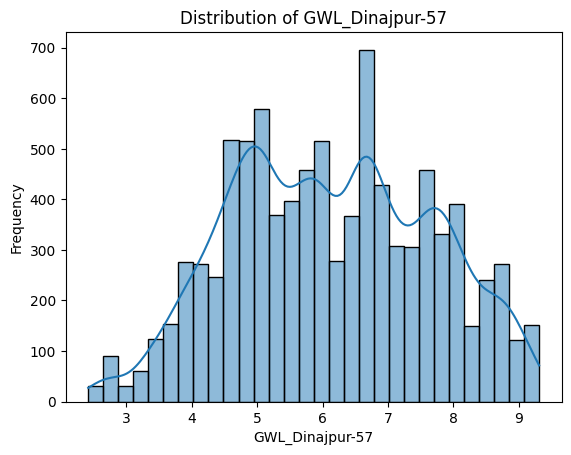

In [8]:
def plot_distribution(df, columns):
    for column in columns:
        if column != 'Date':  
            sns.histplot(df[column], kde=True)
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)  
            plt.ylabel("Frequency")  
            plt.show()


numerical_cols = df.columns[1:]  

plot_distribution(df, numerical_cols)

## Data Cleaning,Checking errors, Missing values

In [9]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)

# Calling the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [10]:
checker.check_missing_values()

No missing values found in DataFrame


## Outlier detection(Normality test)

In [11]:
def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [12]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten() 
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()        
        
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

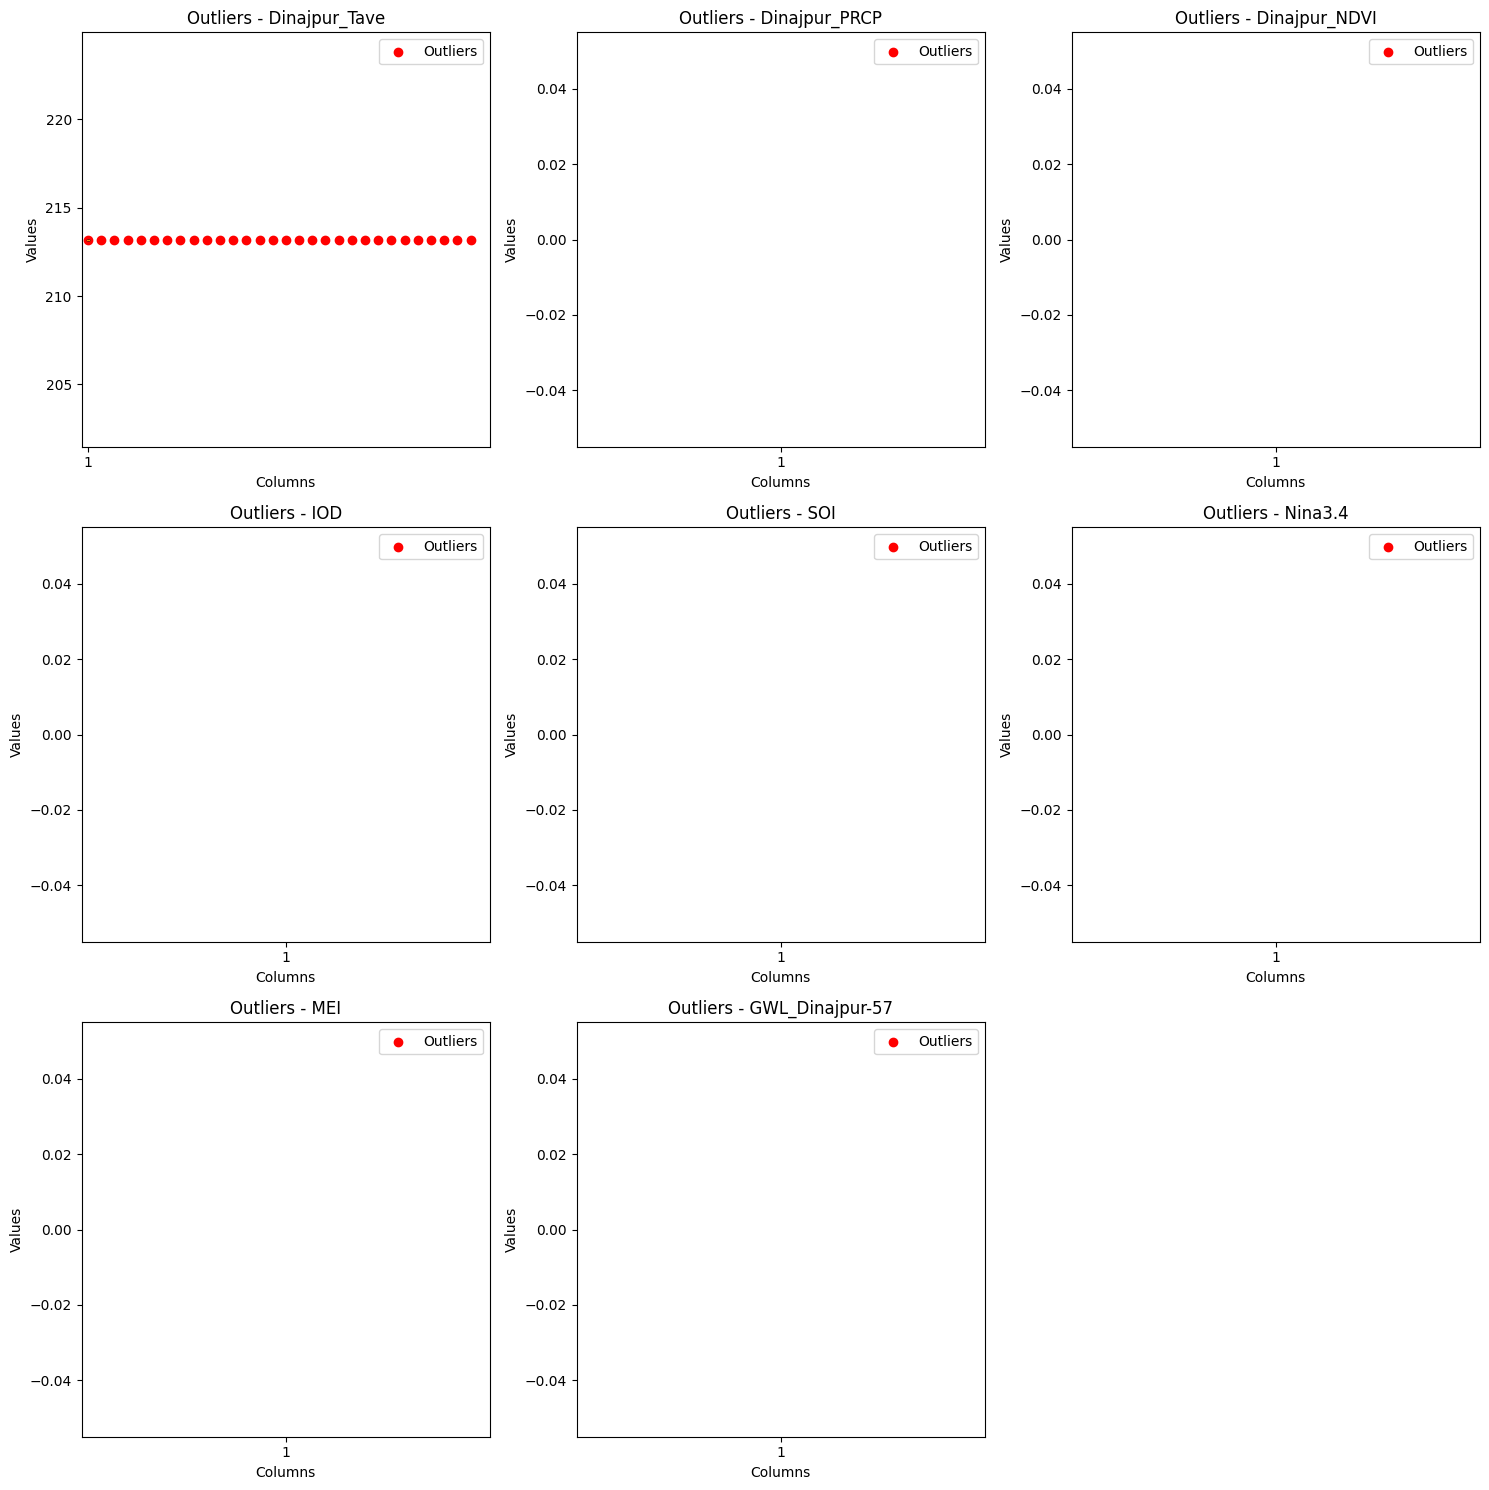

Number of total outliers: 1004


In [13]:
# Detecting outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualizing outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

## Multicollinearity statistics

In [14]:
numeric_df = df.iloc[:, 1:-1]  

# Calculating VIF for each variable
vif_data = numeric_df.copy()
vif_data['Intercept'] = 1 

# Calculating VIF values
vif_values = pd.Series([variance_inflation_factor(vif_data.values, i) 
                        for i in range(vif_data.shape[1])], 
                       index=vif_data.columns)

# Calculating Tolerance from VIF
tolerance_values = 1 / vif_values

# Displaying the results
print("VIF Values:")
print(vif_values)

print("\nTolerance Values:")
print(tolerance_values)

VIF Values:
Dinajpur_Tave     1.051337
Dinajpur_PRCP     1.057454
Dinajpur_NDVI     1.092486
IOD               1.194398
SOI               2.160893
Nina3.4           2.633041
MEI               1.561941
Intercept        14.448456
dtype: float64

Tolerance Values:
Dinajpur_Tave    0.951170
Dinajpur_PRCP    0.945668
Dinajpur_NDVI    0.915343
IOD              0.837242
SOI              0.462772
Nina3.4          0.379789
MEI              0.640229
Intercept        0.069212
dtype: float64


# 3.  Machine Learning Modelling

## Data Splitting

In [15]:
X = df.drop(columns=['GWL_Dinajpur-57', 'Date'])
y = df['GWL_Dinajpur-57']

# Splitting data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### ## Visualization: Data Splitting for Machine Learning

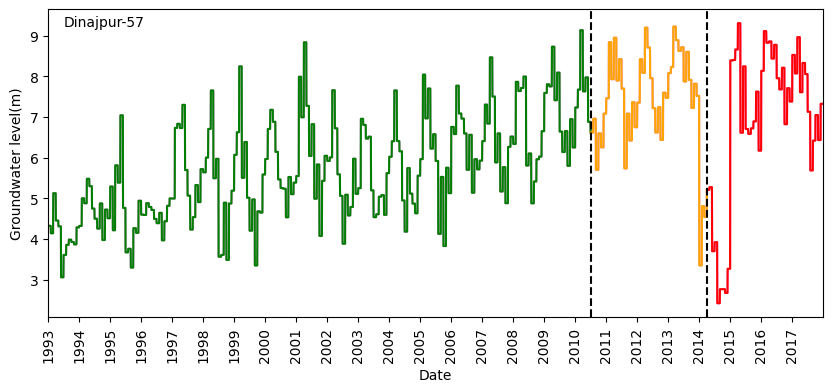

In [16]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Sorting DataFrame by 'Date'
df = df.sort_values(by='Date')

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Plotting the entire dataset
plt.plot(df['Date'], df['GWL_Dinajpur-57'], color='violet')

# Plotting training data
plt.plot(df['Date'][:len(X_train)], df['GWL_Dinajpur-57'][:len(X_train)], color='green', label='Training Set')

# Plotting validation data
plt.plot(df['Date'][len(X_train):len(X_train) + len(X_val)], df['GWL_Dinajpur-57'][len(X_train):len(X_train) + len(X_val)], color='orange', label='Validation Set')

# Plotting test data
plt.plot(df['Date'][len(X_train) + len(X_val):], df['GWL_Dinajpur-57'][len(X_train) + len(X_val):], color='red', label='Test Set')

plt.axvline(df['Date'][len(X_train)], color='black', linestyle='--')
plt.axvline(df['Date'][len(X_train) + len(X_val)], color='black', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Groundwater level(m)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(df['Date'].min(), df['Date'].max())
plt.xticks(rotation=90) 
plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.grid(False)
plt.show()

In [17]:
X_train

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
3063,27.7,222.0,0.3292,-0.157832,-9.0,-0.30,-0.322
1940,26.4,148.0,0.1080,-0.131525,-24.4,0.90,2.821
6848,27.4,0.0,0.1967,0.348779,7.3,-0.93,-0.071
3509,28.9,246.0,0.1252,-0.293105,-14.6,0.70,0.636
1612,29.1,501.0,0.1765,0.010510,-24.1,1.15,2.602
...,...,...,...,...,...,...,...
5734,28.7,242.0,0.1999,0.050483,13.5,-0.28,-0.318
5191,23.2,2.0,0.2692,0.147723,-1.4,-0.15,-0.864
5390,26.8,51.0,0.1459,0.130834,5.4,-1.40,-0.669
860,30.3,54.0,0.2495,-0.039353,-9.0,0.03,0.940


In [18]:
y_train

3063    7.2750
1940    7.6550
6848    6.4240
3509    5.0875
1612    5.6960
         ...  
5734    5.4150
5191    6.8400
5390    4.8800
860     7.0425
7270    7.6000
Name: GWL_Dinajpur-57, Length: 6391, dtype: float64

In [19]:
X_temp

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
4043,14.8,7.0,0.1418,-0.116838,-11.6,0.26,0.526
3573,26.4,56.0,0.3521,0.626101,-7.4,1.16,1.090
4505,27.1,255.0,0.1897,0.196267,-14.5,0.30,0.588
5381,28.3,234.0,0.1418,0.380060,1.4,-1.04,-0.800
2881,22.6,0.0,0.1011,-0.029802,22.4,-0.75,-0.397
...,...,...,...,...,...,...,...
1489,15.5,21.0,0.2406,-0.058970,4.1,-0.43,-0.453
812,23.8,10.0,0.2367,0.107568,3.5,0.49,0.935
1882,19.6,17.0,0.1146,0.134668,-19.2,2.08,2.823
4974,29.5,126.0,0.1101,0.164956,-15.9,0.37,-0.474


In [20]:
y_temp

4043    6.0225
3573    4.7875
4505    6.2240
5381    5.7675
2881    5.1020
         ...  
1489    4.9940
812     5.8120
1882    6.0020
4974    6.5625
4039    6.0225
Name: GWL_Dinajpur-57, Length: 2740, dtype: float64

In [21]:
X_val

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
7609,21.4,0.0,0.1407,-0.067228,9.2,-0.02,-0.911
4084,25.2,12.0,0.1778,-0.109683,0.2,-0.10,0.118
7920,32.1,424.0,0.1272,-0.465427,-7.6,0.37,-0.523
8327,31.4,0.0,0.3561,0.403764,-20.2,2.21,-0.228
2716,28.9,399.0,0.1538,-0.067885,-5.5,-0.75,-0.711
...,...,...,...,...,...,...,...
5762,26.3,45.0,0.3646,0.102282,13.4,-0.30,-0.012
3254,213.2,53.0,0.1593,-0.082291,7.2,-0.28,-0.290
4541,29.3,474.0,0.1731,0.016435,2.6,0.22,0.737
350,19.0,0.0,0.1413,-0.157270,1.6,0.19,0.784


In [22]:
X_test

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
4710,21.7,0.0,0.1467,-0.361621,-2.0,-0.44,-0.998
131,26.8,308.0,0.1435,0.312997,-8.2,0.93,1.860
2802,27.9,196.0,0.1075,0.012307,9.9,-0.39,-0.113
4472,24.4,37.0,0.1239,-0.561639,0.2,0.28,0.631
1108,16.5,16.0,0.2660,0.337663,8.4,-0.65,-0.437
...,...,...,...,...,...,...,...
2948,15.5,0.0,0.2584,0.152971,8.4,-0.88,-0.706
6394,29.6,356.0,0.3326,-0.197084,20.5,-0.89,-1.964
1746,25.5,3.0,0.1809,1.088737,-17.8,2.29,3.214
5820,19.1,0.0,0.4334,-0.102193,13.3,-0.90,-0.540


In [23]:
y_val

7609    7.820000
4084    7.655000
7920    2.762500
8327    6.893333
2716    5.465000
          ...   
5762    5.962000
3254    5.430000
4541    6.577500
350     4.284000
2164    5.188000
Name: GWL_Dinajpur-57, Length: 1370, dtype: float64

In [24]:
y_test

4710    5.752000
131     4.310000
2802    4.533333
4472    6.968000
1108    4.598333
          ...   
2948    5.548000
6394    6.620000
1746    5.326667
5820    6.652500
6160    6.947500
Name: GWL_Dinajpur-57, Length: 1370, dtype: float64

In [25]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,6391.0,26.531920,12.933740,13.20000,22.500000,27.400000,29.100000,213.200000
Dinajpur_PRCP,6391.0,165.978251,195.709441,0.00000,3.000000,77.000000,287.000000,1026.000000
Dinajpur_NDVI,6391.0,0.218292,0.082821,0.06320,0.152000,0.201200,0.274000,0.445800
IOD,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [26]:
# Getting the indices of the data points in each set
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

# Checking if there's any overlap between the sets
assert len(set(train_indices).intersection(val_indices)) == 0, "Overlap between training and validation sets!"
assert len(set(train_indices).intersection(test_indices)) == 0, "Overlap between training and test sets!"
assert len(set(val_indices).intersection(test_indices)) == 0, "Overlap between validation and test sets!"

# If the code reaches this point, it means there is no overlap
print("No overlap detected. Data splitting is correct.")

No overlap detected. Data splitting is correct.


### Descriptive Statistics(Training,Validation and Testing stage)

In [27]:
# Training Set: Descriptive Statistics
train_stats = X_train.describe()
print("Descriptive Statistics: Training Set ")
train_stats.T

Descriptive Statistics: Training Set 


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,6391.0,26.531920,12.933740,13.20000,22.500000,27.400000,29.100000,213.200000
Dinajpur_PRCP,6391.0,165.978251,195.709441,0.00000,3.000000,77.000000,287.000000,1026.000000
Dinajpur_NDVI,6391.0,0.218292,0.082821,0.06320,0.152000,0.201200,0.274000,0.445800
IOD,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [28]:
# Validation Set: Descriptive Statistics
val_stats = X_val.describe()
print("\nDescriptive Statistics: Validation Set ")
val_stats.T


Descriptive Statistics: Validation Set 


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.709197,7.157877,13.20000,22.125000,27.00000,29.000000,213.200000
Dinajpur_PRCP,1370.0,153.270803,184.765685,0.00000,3.000000,64.00000,273.000000,1026.000000
Dinajpur_NDVI,1370.0,0.217190,0.080513,0.06320,0.153275,0.19960,0.274000,0.445800
IOD,1370.0,0.003595,0.355028,-0.88667,-0.204923,-0.02345,0.213949,1.472656
SOI,1370.0,-0.599489,10.584601,-28.60000,-8.000000,0.10000,7.300000,27.100000
Nina3.4,1370.0,0.015898,0.864088,-1.79000,-0.545000,-0.07000,0.470000,2.570000
MEI,1370.0,-0.015441,1.004000,-1.96400,-0.730500,-0.25600,0.582000,3.214000


In [29]:
# Test Set: Descriptive Statistics
test_stats = X_test.describe()
print("\nDescriptive Statistics: Testing Set ")
test_stats.T


Descriptive Statistics: Testing Set 


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.917664,10.118151,13.20000,22.100000,27.300000,28.900000,213.200000
Dinajpur_PRCP,1370.0,156.685401,191.600047,0.00000,1.000000,55.000000,281.000000,1026.000000
Dinajpur_NDVI,1370.0,0.214213,0.080795,0.06320,0.148500,0.199600,0.267800,0.445800
IOD,1370.0,0.017447,0.347552,-0.88667,-0.178294,0.010084,0.227375,1.472656
SOI,1370.0,-0.607445,11.051441,-28.60000,-7.900000,0.000000,7.700000,27.100000
Nina3.4,1370.0,0.008496,0.900322,-1.79000,-0.570000,-0.090000,0.480000,2.570000
MEI,1370.0,0.024823,1.057025,-1.96400,-0.729000,-0.220000,0.644000,3.214000


## Normalization of the data

In [30]:
# Normalization of the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

X_val = pd.DataFrame(
    scaler.transform(X_val),
    columns = X_val.columns
)

In [31]:
X_train.head(2)

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
0,0.09032,0.286272,1.339238,-0.466604,-0.802092,-0.352135,-0.300534
1,-0.01020,-0.091869,-1.331796,-0.389732,-2.245590,1.033736,2.729244


In [32]:
X_test.head(2)

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
0,-0.373620,-0.848151,-0.864486,-1.062112,-0.145957,-0.513820,-0.952183
1,0.020729,0.725733,-0.903126,0.909241,-0.727105,1.068383,1.802862


In [33]:
X_val.head(2)

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI
0,-0.396817,-0.848151,-0.936937,-0.201844,0.903860,-0.028765,-0.868317
1,-0.102988,-0.786831,-0.488947,-0.325903,0.060257,-0.121156,0.123615


## Machine Learning Modelling

In [34]:
# Base models

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'ElasticNet Regression': ElasticNet(),
    'Gaussian Process Regressor': GaussianProcessRegressor(random_state=42),
    'Weighted K-Nearest Neighbors': KNeighborsRegressor(weights='distance'),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'XGBoost': XGBRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Locally Weighted Linear Regression': KNeighborsRegressor(n_neighbors=5, weights='distance')
}

results = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting on the training set
    y_pred_train = model.predict(X_train)
    
    # Predicting on the validation set
    y_pred_val = model.predict(X_val)
    
    # Predicting on the test set
    y_pred_test = model.predict(X_test)

    # Calculating metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_rae = mean_absolute_percentage_error(y_train, y_pred_train)
    train_cc = np.corrcoef(y_train, y_pred_train)[0, 1]

    # Calculating metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rae = mean_absolute_percentage_error(y_val, y_pred_val)
    val_cc = np.corrcoef(y_val, y_pred_val)[0, 1]
    
    # Calculating metrics for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rae = mean_absolute_percentage_error(y_test, y_pred_test)
    test_cc = np.corrcoef(y_test, y_pred_test)[0, 1]

    results[name] = {
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train R-squared': train_r2,
        'Train RAE': train_rae,
        'Train CC': train_cc,        
        'Validation RMSE': val_rmse,
        'Validation MAE': val_mae,
        'Validation R-squared': val_r2,
        'Validation RAE': val_rae,
        'Validation CC': val_cc,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R-squared': test_r2,
        'Test RAE': test_rae,
        'Test CC': test_cc
    }

# Printing the results
for model, metrics in results.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:}")
    print("\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1443
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 6.122821
Metrics for Linear Regression:
Train RMSE: 1.4074345068502792
Train MAE: 1.1570807712312405
Train R-squared: 0.15769403362234768
Train RAE: 0.2102848831109003
Train CC: 0.39710708080107027
Validation RMSE: 1.429021939911834
Validation MAE: 1.1712728544052187
Validation R-squared: 0.13464481956549124
Validation RAE: 0.21557119112327294
Validation CC: 0.36863323237117857
Test RMSE: 1.389034024697749
Test MAE: 1.1343521983496114
Test R-squared: 0.14410824160760027
Test RAE: 0.19940440646271843
Test CC: 0.38118104215867593


Metrics for Decision Tree:
Train RMSE: 1.9435990517785564e-15
Train MAE: 1.5228000365927275e-15
Train R-squared: 1.0
Train RAE: 2.509

# 4. Hyperparameter tuning

## 1. Random Forest Regressor ( Hyperparameter Tuning)

In [35]:
# Initializing Random Forest model
random_forest = RandomForestRegressor()

# the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 5, 10],    
    'min_samples_split': [2, 5, 10] 
}

# Initializing Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Performing Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Getting the best hyperparameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predicting on training set using Random Forest
rf_pred_train = best_rf.predict(X_train)

# Calculating metrics for Random Forest on training set
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_pred_train))
rf_mae_train = mean_absolute_error(y_train, rf_pred_train)
rf_r2_train = r2_score(y_train, rf_pred_train)
rf_rae_train = mean_absolute_percentage_error(y_train, rf_pred_train)
rf_cc_train = np.corrcoef(y_train, rf_pred_train)[0, 1]

# Predicting on validation set using Random Forest
rf_pred_val = best_rf.predict(X_val)

# Calculating metrics for Random Forest on validation set
rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_pred_val))
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)
rf_rae_val = mean_absolute_percentage_error(y_val, rf_pred_val)
rf_cc_val = np.corrcoef(y_val, rf_pred_val)[0, 1]

# Predicting on test set using Random Forest
rf_pred_test = best_rf.predict(X_test)

# Calculating metrics for Random Forest on test set
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_pred_test))
rf_mae_test = mean_absolute_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)
rf_rae_test = mean_absolute_percentage_error(y_test, rf_pred_test)
rf_cc_test = np.corrcoef(y_test, rf_pred_test)[0, 1]

print("Best Hyperparameters for Random Forest:", best_params_rf)
print()

# Printing metrics for training set
print("Random Forest RMSE (Train):", rf_rmse_train)
print("Random Forest MAE (Train):", rf_mae_train)
print("Random Forest R-squared (Train):", rf_r2_train)
print("Random Forest RAE (Train):", rf_rae_train)
print("Random Forest CC (Train):", rf_cc_train)

print()


print("Random Forest RMSE (Validation):", rf_rmse_val)
print("Random Forest MAE (Validation):", rf_mae_val)
print("Random Forest R-squared (Validation):", rf_r2_val)
print("Random Forest RAE (Validation):", rf_rae_val)
print("Random Forest CC (Validation):", rf_cc_val)

print()

print("Random Forest RMSE (Test):", rf_rmse_test)
print("Random Forest MAE (Test):", rf_mae_test)
print("Random Forest R-squared (Test):", rf_r2_test)
print("Random Forest RAE (Test):", rf_rae_test)
print("Random Forest CC (Test):", rf_cc_test)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}

Random Forest RMSE (Train): 4.203673027192145e-15
Random Forest MAE (Train): 3.555076225058504e-15
Random Forest R-squared (Train): 1.0
Random Forest RAE (Train): 5.802662115177159e-16
Random Forest CC (Train): 1.0

Random Forest RMSE (Validation): 4.290918868647417e-15
Random Forest MAE (Validation): 3.59323276729047e-15
Random Forest R-squared (Validation): 1.0
Random Forest RAE (Validation): 5.808883054300948e-16
Random Forest CC (Validation): 1.0

Random Forest RMSE (Test): 4.200681421998407e-15
Random Forest MAE (Test): 3.531967905493637e-15
Random Forest R-squared (Test): 1.0
Random Forest RAE (Test): 5.690695143067179e-16
Random Forest CC (Test): 1.0


## 2. AdaBoost ( Hyperparameter Tuning)

In [36]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the AdaBoostRegressor model
adaboost = AdaBoostRegressor(random_state=42)

# Define the search space for hyperparameters
param_space = {
    'n_estimators': Integer(50, 200),      # Number of estimators
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),  # Learning rate
    'loss': ['linear', 'square', 'exponential']  # Loss function options
}

# Initialize Bayesian Optimization for AdaBoostRegressor
adaboost_search = BayesSearchCV(
    adaboost, 
    param_space, 
    n_iter=50, 
    scoring='neg_mean_squared_error',
    cv=5, 
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Optimization for AdaBoostRegressor
adaboost_search.fit(X_train, y_train)

# Get the best hyperparameters and model for AdaBoostRegressor
best_adaboost = adaboost_search.best_estimator_
best_params_adaboost = adaboost_search.best_params_

# Predicting on training set using AdaBoostRegressor
adaboost_pred_train = best_adaboost.predict(X_train)

adaboost_rae_train = np.mean(np.abs(y_train - adaboost_pred_train) / np.abs(y_train))
adaboost_cc_train = np.corrcoef(y_train, adaboost_pred_train)[0, 1]
adaboost_rmse_train = np.sqrt(mean_squared_error(y_train, adaboost_pred_train))
adaboost_mae_train = mean_absolute_error(y_train, adaboost_pred_train)
adaboost_r2_train = r2_score(y_train, adaboost_pred_train)

print("Best Hyperparameters for AdaBoostRegressor:", best_params_adaboost)
print()

print("AdaBoostRegressor RMSE (Train):", adaboost_rmse_train)
print("AdaBoostRegressor MAE (Train):", adaboost_mae_train)
print("AdaBoostRegressor R-squared (Train):", adaboost_r2_train)
print("AdaBoostRegressor RAE (Train):", adaboost_rae_train)
print("AdaBoostRegressor CC (Train):", adaboost_cc_train)

# Predicting on validation set using AdaBoostRegressor
adaboost_pred_val = best_adaboost.predict(X_val)

adaboost_rae_val = np.mean(np.abs(y_val - adaboost_pred_val) / np.abs(y_val))
adaboost_cc_val = np.corrcoef(y_val, adaboost_pred_val)[0, 1]
adaboost_rmse_val = np.sqrt(mean_squared_error(y_val, adaboost_pred_val))
adaboost_mae_val = mean_absolute_error(y_val, adaboost_pred_val)
adaboost_r2_val = r2_score(y_val, adaboost_pred_val)

print("\nAdaBoostRegressor RMSE (Validation):", adaboost_rmse_val)
print("AdaBoostRegressor MAE (Validation):", adaboost_mae_val)
print("AdaBoostRegressor R-squared (Validation):", adaboost_r2_val)
print("AdaBoostRegressor RAE (Validation):", adaboost_rae_val)
print("AdaBoostRegressor CC (Validation):", adaboost_cc_val)

# Predicting on the test set using AdaBoostRegressor
adaboost_pred_test = best_adaboost.predict(X_test)

adaboost_rae_test = np.mean(np.abs(y_test - adaboost_pred_test) / np.abs(y_test))
adaboost_cc_test = np.corrcoef(y_test, adaboost_pred_test)[0, 1]
adaboost_rmse_test = np.sqrt(mean_squared_error(y_test, adaboost_pred_test))
adaboost_mae_test = mean_absolute_error(y_test, adaboost_pred_test)
adaboost_r2_test = r2_score(y_test, adaboost_pred_test)

print("\nAdaBoostRegressor RMSE (Test):", adaboost_rmse_test)
print("AdaBoostRegressor MAE (Test):", adaboost_mae_test)
print("AdaBoostRegressor R-squared (Test):", adaboost_r2_test)
print("AdaBoostRegressor RAE (Test):", adaboost_rae_test)
print("AdaBoostRegressor CC (Test):", adaboost_cc_test)

Best Hyperparameters for AdaBoostRegressor: OrderedDict([('learning_rate', 1.0), ('loss', 'square'), ('n_estimators', 161)])

AdaBoostRegressor RMSE (Train): 1.0653498317954
AdaBoostRegressor MAE (Train): 0.935747694047451
AdaBoostRegressor R-squared (Train): 0.5173881615330889
AdaBoostRegressor RAE (Train): 0.1693605568971524
AdaBoostRegressor CC (Train): 0.7759055243132222

AdaBoostRegressor RMSE (Validation): 1.0684592476656707
AdaBoostRegressor MAE (Validation): 0.9413842257876774
AdaBoostRegressor R-squared (Validation): 0.5162371331517754
AdaBoostRegressor RAE (Validation): 0.17123451719619195
AdaBoostRegressor CC (Validation): 0.7731228033216513

AdaBoostRegressor RMSE (Test): 1.0580122988216583
AdaBoostRegressor MAE (Test): 0.9242251811422233
AdaBoostRegressor R-squared (Test): 0.5034368255303359
AdaBoostRegressor RAE (Test): 0.16326855047022334
AdaBoostRegressor CC (Test): 0.7627799562546227


## 3. Gaussian Process Regression ( Hyperparameter Tuning)

In [37]:
# the hyperparameters and their possible values for Gaussian Process Regression
param_grid_gpr = {
    'kernel': [None, 1.0 * RBF(length_scale=1.0), Matern(length_scale=1.0, nu=1.5), WhiteKernel(noise_level=1.0)],   
  
}

# Initializing Grid Search for Gaussian Process Regression
grid_search_gpr = GridSearchCV(GaussianProcessRegressor(), param_grid_gpr, scoring='neg_mean_squared_error', cv=5)
grid_search_gpr.fit(X_train, y_train)

# Getting the best hyperparameters and model for Gaussian Process Regression
best_gpr = grid_search_gpr.best_estimator_
best_params_gpr = grid_search_gpr.best_params_

# Predicting on training set using Gaussian Process Regression
gpr_pred_train = best_gpr.predict(X_train)

# Calculating metrics for Gaussian Process Regression on training set
gpr_rmse_train = np.sqrt(mean_squared_error(y_train, gpr_pred_train))
gpr_mae_train = mean_absolute_error(y_train, gpr_pred_train)
gpr_r2_train = r2_score(y_train, gpr_pred_train)
gpr_rae_train = mean_absolute_percentage_error(y_train, gpr_pred_train)
gpr_cc_train = np.corrcoef(y_train, gpr_pred_train)[0, 1]

# Predicting on validation set using Gaussian Process Regression
gpr_pred_val = best_gpr.predict(X_val)

# Calculating metrics for Gaussian Process Regression on validation set
gpr_rmse_val = np.sqrt(mean_squared_error(y_val, gpr_pred_val))
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)
gpr_rae_val = mean_absolute_percentage_error(y_val, gpr_pred_val)
gpr_cc_val = np.corrcoef(y_val, gpr_pred_val)[0, 1]

# Predicting on test set using Gaussian Process Regression
gpr_pred_test = best_gpr.predict(X_test)

# Calculating metrics for Gaussian Process Regression on test set
gpr_rmse_test = np.sqrt(mean_squared_error(y_test, gpr_pred_test))
gpr_mae_test = mean_absolute_error(y_test, gpr_pred_test)
gpr_r2_test = r2_score(y_test, gpr_pred_test)
gpr_rae_test = mean_absolute_percentage_error(y_test, gpr_pred_test)
gpr_cc_test = np.corrcoef(y_test, gpr_pred_test)[0, 1]

print("Best Hyperparameters for Gaussian Process Regression:", best_params_gpr)
print()

# Printing metrics for training set
print("Gaussian Process RMSE (Train):", gpr_rmse_train)
print("Gaussian Process MAE (Train):", gpr_mae_train)
print("Gaussian Process R-squared (Train):", gpr_r2_train)
print("Gaussian Process RAE (Train):", gpr_rae_train)
print("Gaussian Process CC (Train):", gpr_cc_train)

print()

print("Gaussian Process RMSE (Validation):", gpr_rmse_val)
print("Gaussian Process MAE (Validation):", gpr_mae_val)
print("Gaussian Process R-squared (Validation):", gpr_r2_val)
print("Gaussian Process RAE (Validation):", gpr_rae_val)
print("Gaussian Process CC (Validation):", gpr_cc_val) 

print()

# Printing metrics for test set
print("Gaussian Process RMSE (Test):", gpr_rmse_test)
print("Gaussian Process MAE (Test):", gpr_mae_test)
print("Gaussian Process R-squared (Test):", gpr_r2_test)
print("Gaussian Process RAE (Test):", gpr_rae_test)
print("Gaussian Process CC (Test):", gpr_cc_test)

Best Hyperparameters for Gaussian Process Regression: {'kernel': 1**2 * RBF(length_scale=1)}

Gaussian Process RMSE (Train): 7.510900557504241e-13
Gaussian Process MAE (Train): 7.202334835905037e-13
Gaussian Process R-squared (Train): 1.0
Gaussian Process RAE (Train): 1.1741758131005048e-13
Gaussian Process CC (Train): 1.0

Gaussian Process RMSE (Validation): 7.982537518997885e-13
Gaussian Process MAE (Validation): 7.63347536032936e-13
Gaussian Process R-squared (Validation): 1.0
Gaussian Process RAE (Validation): 1.248242303830266e-13
Gaussian Process CC (Validation): 1.0

Gaussian Process RMSE (Test): 8.084769671515835e-13
Gaussian Process MAE (Test): 7.756549660472332e-13
Gaussian Process R-squared (Test): 1.0
Gaussian Process RAE (Test): 1.2533883197133677e-13
Gaussian Process CC (Test): 1.0


## 4. Weighted K-Nearest Neighbors ( Hyperparameter Tuning)

In [38]:
# the hyperparameters and their possible values for Weighted K-Nearest Neighbors
param_grid_wknn = {
     'n_neighbors': [3, 5, 7, 9, 11],   
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']  
}

# Initializing Grid Search for Weighted K-Nearest Neighbors
grid_search_wknn = GridSearchCV(KNeighborsRegressor(weights='distance'), param_grid_wknn, scoring='neg_mean_squared_error', cv=5)
grid_search_wknn.fit(X_train, y_train)

# Getting the best hyperparameters and model for Weighted K-Nearest Neighbors
best_wknn = grid_search_wknn.best_estimator_
best_params_wknn = grid_search_wknn.best_params_

# Predicting on training set using Weighted K-Nearest Neighbors
wknn_pred_train = best_wknn.predict(X_train)

# Calculating metrics for Weighted K-Nearest Neighbors on training set
wknn_rmse_train = np.sqrt(mean_squared_error(y_train, wknn_pred_train))
wknn_mae_train = mean_absolute_error(y_train, wknn_pred_train)
wknn_r2_train = r2_score(y_train, wknn_pred_train)
wknn_rae_train = mean_absolute_percentage_error(y_train, wknn_pred_train)

wknn_cc_train = np.corrcoef(y_train, wknn_pred_train)[0, 1]

# Predicting on validation set using Weighted K-Nearest Neighbors
wknn_pred_val = best_wknn.predict(X_val)

# Calculating metrics for Weighted K-Nearest Neighbors on validation set
wknn_rmse_val = np.sqrt(mean_squared_error(y_val, wknn_pred_val))
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)
wknn_rae_val = mean_absolute_percentage_error(y_val, wknn_pred_val)

wknn_cc_val = np.corrcoef(y_val, wknn_pred_val)[0, 1]

# Predicting on test set using Weighted K-Nearest Neighbors
wknn_pred_test = best_wknn.predict(X_test)

# Calculating metrics for Weighted K-Nearest Neighbors on test set
wknn_rmse_test = np.sqrt(mean_squared_error(y_test, wknn_pred_test))
wknn_mae_test = mean_absolute_error(y_test, wknn_pred_test)
wknn_r2_test = r2_score(y_test, wknn_pred_test)
wknn_rae_test = mean_absolute_percentage_error(y_test, wknn_pred_test)

wknn_cc_test = np.corrcoef(y_test, wknn_pred_test)[0, 1]

print("Best Hyperparameters for Weighted K-Nearest Neighbors:", best_params_wknn)
print()

# Printing metrics for training set
print("Weighted K-NN RMSE (Train):", wknn_rmse_train)
print("Weighted K-NN MAE (Train):", wknn_mae_train)
print("Weighted K-NN R-squared (Train):", wknn_r2_train)
print("Weighted K-NN RAE (Train):", wknn_rae_train)
print("Weighted K-NN CC (Train):", wknn_cc_train)

print()

print("Weighted K-NN RMSE (Validation):", wknn_rmse_val)
print("Weighted K-NN MAE (Validation):", wknn_mae_val)
print("Weighted K-NN R-squared (Validation):", wknn_r2_val)
print("Weighted K-NN RAE (Validation):", wknn_rae_val)
print("Weighted K-NN CC (Validation):", wknn_cc_val) 

print()

# Printing metrics for test set
print("Weighted K-NN RMSE (Test):", wknn_rmse_test)
print("Weighted K-NN MAE (Test):", wknn_mae_test)
print("Weighted K-NN R-squared (Test):", wknn_r2_test)
print("Weighted K-NN RAE (Test):", wknn_rae_test)
print("Weighted K-NN CC (Test):", wknn_cc_test)

Best Hyperparameters for Weighted K-Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'p': 1}

Weighted K-NN RMSE (Train): 2.437889145788322e-16
Weighted K-NN MAE (Train): 7.059844112152459e-17
Weighted K-NN R-squared (Train): 1.0
Weighted K-NN RAE (Train): 1.0236365448889316e-17
Weighted K-NN CC (Train): 1.0

Weighted K-NN RMSE (Validation): 2.335767129955145e-16
Weighted K-NN MAE (Validation): 6.580299970771001e-17
Weighted K-NN R-squared (Validation): 1.0
Weighted K-NN RAE (Validation): 9.807553444826842e-18
Weighted K-NN CC (Validation): 1.0

Weighted K-NN RMSE (Test): 2.3875777912481357e-16
Weighted K-NN MAE (Test): 6.742376324730877e-17
Weighted K-NN R-squared (Test): 1.0
Weighted K-NN RAE (Test): 9.698455558166646e-18
Weighted K-NN CC (Test): 1.0


## 5. Bayesian Ridge Regression ( Hyperparameter Tuning)

In [39]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the Bayesian Ridge model
bayesian_ridge = BayesianRidge()

# Define the search space for hyperparameters
param_space = {
    'n_iter': Integer(100, 500),
    'tol': Real(1e-5, 1e-3, prior='log-uniform'),
    'alpha_1': Real(1e-8, 1e-6, prior='log-uniform'),
    'alpha_2': Real(1e-8, 1e-6, prior='log-uniform'),
    'lambda_1': Real(1e-8, 1e-6, prior='log-uniform'),
    'lambda_2': Real(1e-8, 1e-6, prior='log-uniform')
}

# Initialize Bayesian Optimization for Bayesian Ridge
bayesian_search = BayesSearchCV(
    bayesian_ridge, 
    param_space, 
    n_iter=50, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Optimization for Bayesian Ridge
bayesian_search.fit(X_train, y_train)

# Get the best hyperparameters and model for Bayesian Ridge
best_bayesian_ridge = bayesian_search.best_estimator_
best_params_bayesian_ridge = bayesian_search.best_params_

# Printing metrics for training set
bayesian_ridge_pred_train = best_bayesian_ridge.predict(X_train)
bayesian_ridge_rmse_train = np.sqrt(mean_squared_error(y_train, bayesian_ridge_pred_train))
bayesian_ridge_mae_train = mean_absolute_error(y_train, bayesian_ridge_pred_train)
bayesian_ridge_r2_train = r2_score(y_train, bayesian_ridge_pred_train)
bayesian_ridge_rae_train = np.sum(np.abs(y_train - bayesian_ridge_pred_train)) / np.sum(np.abs(y_train - np.mean(y_train)))
bayesian_ridge_cc_train = np.corrcoef(y_train, bayesian_ridge_pred_train)[0, 1]

print("Bayesian Ridge RMSE (Train):", bayesian_ridge_rmse_train)
print("Bayesian Ridge MAE (Train):", bayesian_ridge_mae_train)
print("Bayesian Ridge R-squared (Train):", bayesian_ridge_r2_train)
print("Bayesian Ridge RAE (Train):", bayesian_ridge_rae_train)
print("Bayesian Ridge CC (Train):", bayesian_ridge_cc_train)

print()

# Predicting on validation set using Bayesian Ridge
bayesian_ridge_pred_val = best_bayesian_ridge.predict(X_val)
bayesian_ridge_rmse_val = np.sqrt(mean_squared_error(y_val, bayesian_ridge_pred_val))
bayesian_ridge_mae_val = mean_absolute_error(y_val, bayesian_ridge_pred_val)
bayesian_ridge_r2_val = r2_score(y_val, bayesian_ridge_pred_val)
bayesian_ridge_rae_val = np.sum(np.abs(y_val - bayesian_ridge_pred_val)) / np.sum(np.abs(y_val - np.mean(y_val)))
bayesian_ridge_cc_val = np.corrcoef(y_val, bayesian_ridge_pred_val)[0, 1]

print("Bayesian Ridge RMSE (Validation):", bayesian_ridge_rmse_val)
print("Bayesian Ridge MAE (Validation):", bayesian_ridge_mae_val)
print("Bayesian Ridge R-squared (Validation):", bayesian_ridge_r2_val)
print("Bayesian Ridge RAE (Validation):", bayesian_ridge_rae_val)
print("Bayesian Ridge CC (Validation):", bayesian_ridge_cc_val)

print()

# Predicting on test set using Bayesian Ridge
bayesian_ridge_pred_test = best_bayesian_ridge.predict(X_test)
bayesian_ridge_rmse_test = np.sqrt(mean_squared_error(y_test, bayesian_ridge_pred_test))
bayesian_ridge_mae_test = mean_absolute_error(y_test, bayesian_ridge_pred_test)
bayesian_ridge_r2_test = r2_score(y_test, bayesian_ridge_pred_test)
bayesian_ridge_rae_test = np.sum(np.abs(y_test - bayesian_ridge_pred_test)) / np.sum(np.abs(y_test - np.mean(y_test)))
bayesian_ridge_cc_test = np.corrcoef(y_test, bayesian_ridge_pred_test)[0, 1]

print("Bayesian Ridge RMSE (Test):", bayesian_ridge_rmse_test)
print("Bayesian Ridge MAE (Test):", bayesian_ridge_mae_test)
print("Bayesian Ridge R-squared (Test):", bayesian_ridge_r2_test)
print("Bayesian Ridge RAE (Test):", bayesian_ridge_rae_test)
print("Bayesian Ridge CC (Test):", bayesian_ridge_cc_test)

Bayesian Ridge RMSE (Train): 1.4074409166606434
Bayesian Ridge MAE (Train): 1.1575843656166243
Bayesian Ridge R-squared (Train): 0.15768636145887394
Bayesian Ridge RAE (Train): 0.8966588678122877
Bayesian Ridge CC (Train): 0.39710421438194093

Bayesian Ridge RMSE (Validation): 1.4290764103526519
Bayesian Ridge MAE (Validation): 1.1717994823289262
Bayesian Ridge R-squared (Validation): 0.1345788483229522
Bayesian Ridge RAE (Validation): 0.9074163822839072
Bayesian Ridge CC (Validation): 0.3685001779122313

Bayesian Ridge RMSE (Test): 1.389003763210655
Bayesian Ridge MAE (Test): 1.1348372717591957
Bayesian Ridge R-squared (Test): 0.14414553410699937
Bayesian Ridge RAE (Test): 0.8971137640770278
Bayesian Ridge CC (Test): 0.3810899427025659


## 6. XGBoost Regressor ( Hyperparameter Tuning)

In [40]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
    'gamma': Real(0, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for XGBoost Regressor
bayes_search_xgb = BayesSearchCV(
    XGBRegressor(),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10, 
    random_state=42,  
    n_jobs=-1,  
    verbose=1, 
    n_points=5, 
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_xgb.fit(X_train, y_train)

# Getting the best hyperparameters and model for XGBoost Regressor
best_xgb = bayes_search_xgb.best_estimator_
best_params_xgb = bayes_search_xgb.best_params_

# Predicting on training set using XGBoost Regressor
xgb_pred_train = best_xgb.predict(X_train)

# Calculating metrics for XGBoost Regressor on training set
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
xgb_mae_train = mean_absolute_error(y_train, xgb_pred_train)
xgb_r2_train = r2_score(y_train, xgb_pred_train)
xgb_rae_train = mean_absolute_percentage_error(y_train, xgb_pred_train)
xgb_cc_train = np.corrcoef(y_train, xgb_pred_train)[0, 1]

# Predicting on validation set using XGBoost Regressor
xgb_pred_val = best_xgb.predict(X_val)

# Calculating metrics for XGBoost Regressor on validation set
xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_pred_val))
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)
xgb_rae_val = mean_absolute_percentage_error(y_val, xgb_pred_val)
xgb_cc_val = np.corrcoef(y_val, xgb_pred_val)[0, 1]

# Predicting on test set using XGBoost Regressor
xgb_pred_test = best_xgb.predict(X_test)

# Calculating metrics for XGBoost Regressor on test set
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_pred_test))
xgb_mae_test = mean_absolute_error(y_test, xgb_pred_test)
xgb_r2_test = r2_score(y_test, xgb_pred_test)
xgb_rae_test = mean_absolute_percentage_error(y_test, xgb_pred_test)
xgb_cc_test = np.corrcoef(y_test, xgb_pred_test)[0, 1]

print("Best Hyperparameters for XGBoost Regressor:", best_params_xgb)
print()

# Printing metrics for training set
print("XGBoost RMSE (Train):", xgb_rmse_train)
print("XGBoost MAE (Train):", xgb_mae_train)
print("XGBoost R-squared (Train):", xgb_r2_train)
print("XGBoost RAE (Train):", xgb_rae_train)
print("XGBoost CC (Train):", xgb_cc_train)

print()

print("XGBoost RMSE (Validation):", xgb_rmse_val)
print("XGBoost MAE (Validation):", xgb_mae_val)
print("XGBoost R-squared (Validation):", xgb_r2_val)
print("XGBoost RAE (Validation):", xgb_rae_val)
print("XGBoost CC (Validation):", xgb_cc_val)

print()

# Printing metrics for test set
print("XGBoost RMSE (Test):", xgb_rmse_test)
print("XGBoost MAE (Test):", xgb_mae_test)
print("XGBoost R-squared (Test):", xgb_r2_test)
print("XGBoost RAE (Test):", xgb_rae_test)
print("XGBoost CC (Test):", xgb_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for XGBoost Regressor: OrderedDict([('gamma', 0.009563585051707605), ('learning_rate', 0.13856447107447098), ('max_depth', 5), ('n_estimators', 162)])

XGBoost RMSE (Train): 0.03490614359896565
XGBoost MAE (Train): 0.025977637451544956
XGBoost R-squared (Train): 0.9994818956607587
XGBoost RAE (Train): 0.004618492954389236
XGBoost CC (Train): 0.9998023723180549

XGBoost RMSE (Validation): 0.038126098539536066
XGBoost MAE (Validation): 0.02895472135560208
XGBoost R-squared (Validation): 0.9993840274813887
XGBoost RAE (Validation): 0.005148358221281547
XGBoost CC (Validation): 0.9997707605197843

XGBoost RMSE (Test): 0.03788996159204354
XGBoost MAE (Test): 0.02794372105765072
XGBoost R-squared (Test): 0.9993631437627992
XGBoost RAE (Test): 0.0048789765420994
XGBoost CC (Test): 0.9997660710385808


## 7. CatBoost Regressor  ( Hyperparameter Tuning)

In [41]:
# Defining the search space for hyperparameters
param_dist = {
    'iterations': Integer(100, 300),
    'depth': Integer(4, 8),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for CatBoost Regressor
bayes_search_catboost = BayesSearchCV(
    CatBoostRegressor(verbose=0),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,
    random_state=42,  
    n_jobs=-1, 
    verbose=1,  
    n_points=5,
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_catboost.fit(X_train, y_train)

# Getting the best hyperparameters and model for CatBoost Regressor
best_catboost = bayes_search_catboost.best_estimator_
best_params_catboost = bayes_search_catboost.best_params_

# Predicting on training set using CatBoost Regressor
catboost_pred_train = best_catboost.predict(X_train)

# Calculating metrics for CatBoost Regressor on training set
catboost_rmse_train = np.sqrt(mean_squared_error(y_train, catboost_pred_train))
catboost_mae_train = mean_absolute_error(y_train, catboost_pred_train)
catboost_r2_train = r2_score(y_train, catboost_pred_train)
catboost_rae_train = mean_absolute_percentage_error(y_train, catboost_pred_train)
catboost_cc_train = np.corrcoef(y_train, catboost_pred_train)[0, 1]

# Predicting on validation set using CatBoost Regressor
catboost_pred_val = best_catboost.predict(X_val)

# Calculating metrics for CatBoost Regressor on validation set
catboost_rmse_val = np.sqrt(mean_squared_error(y_val, catboost_pred_val))
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)
catboost_rae_val = mean_absolute_percentage_error(y_val, catboost_pred_val)
catboost_cc_val = np.corrcoef(y_val, catboost_pred_val)[0, 1]

# Predicting on test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)

# Calculating metrics for CatBoost Regressor on test set
catboost_rmse_test = np.sqrt(mean_squared_error(y_test, catboost_pred_test))
catboost_mae_test = mean_absolute_error(y_test, catboost_pred_test)
catboost_r2_test = r2_score(y_test, catboost_pred_test)
catboost_rae_test = mean_absolute_percentage_error(y_test, catboost_pred_test)
catboost_cc_test = np.corrcoef(y_test, catboost_pred_test)[0, 1]

print("Best Hyperparameters for CatBoost Regressor:", best_params_catboost)
print()

# Printing metrics for training set
print("CatBoost RMSE (Train):", catboost_rmse_train)
print("CatBoost MAE (Train):", catboost_mae_train)
print("CatBoost R-squared (Train):", catboost_r2_train)
print("CatBoost RAE (Train):", catboost_rae_train)
print("CatBoost CC (Train):", catboost_cc_train)

print()

print("CatBoost RMSE (Validation):", catboost_rmse_val)
print("CatBoost MAE (Validation):", catboost_mae_val)
print("CatBoost R-squared (Validation):", catboost_r2_val)
print("CatBoost RAE (Validation):", catboost_rae_val)
print("CatBoost CC (Validation):", catboost_cc_val)

print()

# Printing metrics for test set
print("CatBoost RMSE (Test):", catboost_rmse_test)
print("CatBoost MAE (Test):", catboost_mae_test)
print("CatBoost R-squared (Test):", catboost_r2_test)
print("CatBoost RAE (Test):", catboost_rae_test)
print("CatBoost CC (Test):", catboost_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for CatBoost Regressor: OrderedDict([('depth', 8), ('iterations', 226), ('learning_rate', 0.19853585997384401)])

CatBoost RMSE (Train): 0.00044827356387417983
CatBoost MAE (Train): 0.0003388324671799709
CatBoost R-squared (Train): 0.9999999145524248
CatBoost RAE (Train): 5.994765297112164e-05
CatBoost CC (Train): 0.999999963402444

CatBoost RMSE (Validation): 0.000502824747477226
CatBoost MAE (Validation): 0.0003860191367816108
CatBoost R-squared (Validation): 0.9999998928604314
CatBoost RAE (Validation): 6.849346258384507e-05
CatBoost CC (Validation): 0.9999999553126502

CatBoost RMSE (Test): 0.0004970513266701142
CatBoost MAE (Test): 0.00037161090278189343
CatBoost R-squared (Test): 0.9999998904037861
CatBoost RAE (Test): 6.469639190791761e-05
CatBoost CC (Test): 0.9999999532363891


## 8. LightGBM Regressor ( Hyperparameter Tuning)

In [42]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for LightGBM Regressor
bayes_search_lgb = BayesSearchCV(
    LGBMRegressor(verbosity=-1), 
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42, 
    n_jobs=-1,  
    verbose=1, 
    n_points=5,  
    refit=True 
)

# Performing Bayesian Optimization
bayes_search_lgb.fit(X_train, y_train)

# Getting the best hyperparameters and model for LightGBM Regressor
best_lgb = bayes_search_lgb.best_estimator_
best_params_lgb = bayes_search_lgb.best_params_

# Predicting on training set using LightGBM Regressor
lgb_pred_train = best_lgb.predict(X_train)

# Calculating metrics for LightGBM Regressor on training set
lgb_rmse_train = np.sqrt(mean_squared_error(y_train, lgb_pred_train))
lgb_mae_train = mean_absolute_error(y_train, lgb_pred_train)
lgb_r2_train = r2_score(y_train, lgb_pred_train)
lgb_rae_train = mean_absolute_percentage_error(y_train, lgb_pred_train)
lgb_cc_train = np.corrcoef(y_train, lgb_pred_train)[0, 1]

# Predicting on validation set using LightGBM Regressor
lgb_pred_val = best_lgb.predict(X_val)

# Calculating metrics for LightGBM Regressor on validation set
lgb_rmse_val = np.sqrt(mean_squared_error(y_val, lgb_pred_val))
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)
lgb_rae_val = mean_absolute_percentage_error(y_val, lgb_pred_val)
lgb_cc_val = np.corrcoef(y_val, lgb_pred_val)[0, 1]

# Predicting on test set using LightGBM Regressor
lgb_pred_test = best_lgb.predict(X_test)

# Calculating metrics for LightGBM Regressor on test set
lgb_rmse_test = np.sqrt(mean_squared_error(y_test, lgb_pred_test))
lgb_mae_test = mean_absolute_error(y_test, lgb_pred_test)
lgb_r2_test = r2_score(y_test, lgb_pred_test)
lgb_rae_test = mean_absolute_percentage_error(y_test, lgb_pred_test)
lgb_cc_test = np.corrcoef(y_test, lgb_pred_test)[0, 1]


print("Best Hyperparameters for LightGBM Regressor:", best_params_lgb)

# Printing metrics for training set
print("LightGBM RMSE (Train):", lgb_rmse_train)
print("LightGBM MAE (Train):", lgb_mae_train)
print("LightGBM R-squared (Train):", lgb_r2_train)
print("LightGBM RAE (Train):", lgb_rae_train)
print("LightGBM CC (Train):", lgb_cc_train)

print()

print("LightGBM RMSE (Validation):", lgb_rmse_val)
print("LightGBM MAE (Validation):", lgb_mae_val)
print("LightGBM R-squared (Validation):", lgb_r2_val)
print("LightGBM RAE (Validation):", lgb_rae_val)
print("LightGBM CC (Validation):", lgb_cc_val)

print()

# Printing metrics for test set
print("LightGBM RMSE (Test):", lgb_rmse_test)
print("LightGBM MAE (Test):", lgb_mae_test)
print("LightGBM R-squared (Test):", lgb_r2_test)
print("LightGBM RAE (Test):", lgb_rae_test)
print("LightGBM CC (Test):", lgb_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for LightGBM Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
LightGBM RMSE (Train): 0.006238202151438762
LightGBM MAE (Train): 0.004426497839794718
LightGBM R-squared (Train): 0.999983452500527
LightGBM RAE (Train): 0.0007888687945059313
LightGBM CC (Train): 0.9999928501592215

LightGBM RMSE (Validation): 0.00736619801835243
LightGBM MAE (Validation): 0.005139978814206367
LightGBM R-squared (Validation): 0.999977006589994
LightGBM RAE (Validation): 0.0009133110981101925
LightGBM CC (Validation): 0.9999902190940215

LightGBM RMSE (Test): 0.007062967524821928
LightGBM MAE (Test): 0.004791153144474414
LightGBM R-squared (Test): 0.9999778707092328
LightGBM RAE (Test): 0.0008316915032808696
LightGBM CC (Test): 0.9999904212465006


## 9. Gradient Boosting Regressor ( Hyperparameter Tuning)

In [43]:
# Defining the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initializing Bayesian Optimization for Gradient Boosting Regressor
bayes_search_gbr = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),  
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42,
    n_jobs=-1, 
    verbose=1, 
    n_points=5,  
    refit=True  
)

# Performing Bayesian Optimization
bayes_search_gbr.fit(X_train, y_train)

# Getting the best hyperparameters and model for Gradient Boosting Regressor
best_gbr = bayes_search_gbr.best_estimator_
best_params_gbr = bayes_search_gbr.best_params_

# Predicting on training set using Gradient Boosting Regressor
gbr_pred_train = best_gbr.predict(X_train)

# Calculating metrics for Gradient Boosting Regressor on training set
gbr_rmse_train = np.sqrt(mean_squared_error(y_train, gbr_pred_train))
gbr_mae_train = mean_absolute_error(y_train, gbr_pred_train)
gbr_r2_train = r2_score(y_train, gbr_pred_train)
gbr_rae_train = mean_absolute_percentage_error(y_train, gbr_pred_train)
gbr_cc_train = np.corrcoef(y_train, gbr_pred_train)[0, 1]

# Predicting on validation set using Gradient Boosting Regressor
gbr_pred_val = best_gbr.predict(X_val)

# Calculating metrics for Gradient Boosting Regressor on validation set
gbr_rmse_val = np.sqrt(mean_squared_error(y_val, gbr_pred_val))
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)
gbr_rae_val = mean_absolute_percentage_error(y_val, gbr_pred_val)
gbr_cc_val = np.corrcoef(y_val, gbr_pred_val)[0, 1]

# Predicting on test set using Gradient Boosting Regressor
gbr_pred_test = best_gbr.predict(X_test)

# Calculating metrics for Gradient Boosting Regressor on test set
gbr_rmse_test = np.sqrt(mean_squared_error(y_test, gbr_pred_test))
gbr_mae_test = mean_absolute_error(y_test, gbr_pred_test)
gbr_r2_test = r2_score(y_test, gbr_pred_test)
gbr_rae_test = mean_absolute_percentage_error(y_test, gbr_pred_test)
gbr_cc_test = np.corrcoef(y_test, gbr_pred_test)[0, 1]

print("Best Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print()

# Printing metrics for training set
print("Gradient Boosting RMSE (Train):", gbr_rmse_train)
print("Gradient Boosting MAE (Train):", gbr_mae_train)
print("Gradient Boosting R-squared (Train):", gbr_r2_train)
print("Gradient Boosting RAE (Train):", gbr_rae_train)
print("Gradient Boosting CC (Train):", gbr_cc_train)

print()

print("Gradient Boosting RMSE (Validation):", gbr_rmse_val)
print("Gradient Boosting MAE (Validation):", gbr_mae_val)
print("Gradient Boosting R-squared (Validation):", gbr_r2_val)
print("Gradient Boosting RAE (Validation):", gbr_rae_val)
print("Gradient Boosting CC (Validation):", gbr_cc_val)

print()

# Printing metrics for test set
print("Gradient Boosting RMSE (Test):", gbr_rmse_test)
print("Gradient Boosting MAE (Test):", gbr_mae_test)
print("Gradient Boosting R-squared (Test):", gbr_r2_test)
print("Gradient Boosting RAE (Test):", gbr_rae_test)
print("Gradient Boosting CC (Test):", gbr_cc_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Gradient Boosting Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])

Gradient Boosting RMSE (Train): 0.006022412140232494
Gradient Boosting MAE (Train): 0.0046225966635225725
Gradient Boosting R-squared (Train): 0.9999845775122691
Gradient Boosting RAE (Train): 0.000833858418382508
Gradient Boosting CC (Train): 0.9999937098307241

Gradient Boosting RMSE (Validation): 0.006680046241289868
Gradient Boosting MAE (Validation): 0.00516432122184337
Gradient Boosting R-squared (Validation): 0.9999810906960711
Gradient Boosting RAE (Validation): 0.0009349483940020002
Gradient Boosting CC (Validation): 0.9999923684311427

Gradient Boosting RMSE (Test): 0.006622652307426503
Gradient Boosting MAE (Test): 0.004973703091560854
Gradient Boosting R-squared (Test): 0.9999805438463929
Gradient Boosting RA

## 10.Ridge Regression ( Hyperparameter Tuning)

In [44]:
# Defining the hyperparameters and their possible values for Ridge Regression
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']} 

# Initializing Ridge model
ridge = Ridge(max_iter=10000)

# Initializing Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Training the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Getting the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_

# Predicting on training set using Ridge Regression
ridge_pred_train = best_ridge.predict(X_train)

# Calculating metrics for Ridge Regression on training set
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_mae_train = mean_absolute_error(y_train, ridge_pred_train)
ridge_r2_train = r2_score(y_train, ridge_pred_train)
ridge_rae_train = mean_absolute_percentage_error(y_train, ridge_pred_train)
ridge_cc_train = np.corrcoef(y_train, ridge_pred_train)[0, 1]

# Predicting on validation set using Ridge Regression
ridge_pred_val = best_ridge.predict(X_val)

# Calculating metrics for Ridge Regression on validation set
ridge_rmse_val = np.sqrt(mean_squared_error(y_val, ridge_pred_val))
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)
ridge_rae_val = mean_absolute_percentage_error(y_val, ridge_pred_val)
ridge_cc_val = np.corrcoef(y_val, ridge_pred_val)[0, 1]

# Predicting on test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Calculating metrics for Ridge Regression on test set
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
ridge_mae_test = mean_absolute_error(y_test, ridge_pred_test)
ridge_r2_test = r2_score(y_test, ridge_pred_test)
ridge_rae_test = mean_absolute_percentage_error(y_test, ridge_pred_test)
ridge_cc_test = np.corrcoef(y_test, ridge_pred_test)[0, 1]

print("Best Hyperparameters for Ridge Regression:", grid_search_ridge.best_params_)
print()

# Printing metrics for training set
print("Ridge Regression RMSE (Train):", ridge_rmse_train)
print("Ridge Regression MAE (Train):", ridge_mae_train)
print("Ridge Regression R-squared (Train):", ridge_r2_train)
print("Ridge Regression RAE (Train):", ridge_rae_train)
print("Ridge Regression CC (Train):", ridge_cc_train)

print()

print("Ridge Regression RMSE (Validation):", ridge_rmse_val)
print("Ridge Regression MAE (Validation):", ridge_mae_val)
print("Ridge Regression R-squared (Validation):", ridge_r2_val)
print("Ridge Regression RAE (Validation):", ridge_rae_val)
print("Ridge Regression CC (Validation):", ridge_cc_val)

print()

# Printing metrics for test set
print("Ridge Regression RMSE (Test):", ridge_rmse_test)
print("Ridge Regression MAE (Test):", ridge_mae_test)
print("Ridge Regression R-squared (Test):", ridge_r2_test)
print("Ridge Regression RAE (Test):", ridge_rae_test)
print("Ridge Regression CC (Test):", ridge_cc_test)

Best Hyperparameters for Ridge Regression: {'alpha': 10, 'solver': 'lsqr'}

Ridge Regression RMSE (Train): 1.407435231845221
Ridge Regression MAE (Train): 1.1572500924999851
Ridge Regression R-squared (Train): 0.15769316584808246
Ridge Regression RAE (Train): 0.21031900830498598
Ridge Regression CC (Train): 0.39710675517930216

Ridge Regression RMSE (Validation): 1.4290392566292176
Ridge Regression MAE (Validation): 1.1714502832599116
Ridge Regression R-squared (Validation): 0.13462384689674312
Ridge Regression RAE (Validation): 0.21560420122577376
Ridge Regression CC (Validation): 0.36858886148307546

Ridge Regression RMSE (Test): 1.3890225514135823
Ridge Regression MAE (Test): 1.134515691686889
Ridge Regression R-squared (Test): 0.14412238071237327
Ridge Regression RAE (Test): 0.19943618178426176
Ridge Regression CC (Test): 0.3811510484014067


# 7. Hybrid models

## Hybrid model 1: Training

In [45]:
# Hybrid model 1: Training
hybrid1_pred_train = (bayesian_ridge_pred_train + catboost_pred_train + gbr_pred_train + ridge_pred_train) / 4

# Evaluating the performance of Hybrid Model 1 on training set
hybrid1_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid1_pred_train))
hybrid1_mae_train = mean_absolute_error(y_train, hybrid1_pred_train)
hybrid1_r2_train = r2_score(y_train, hybrid1_pred_train)
hybrid1_rae_train = mean_absolute_percentage_error(y_train, hybrid1_pred_train)
hybrid1_cc_train = np.corrcoef(y_train, hybrid1_pred_train)[0, 1]

# Printing metrics for Hybrid Model 1 on training set
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Training):", hybrid1_rmse_train)
print("Hybrid Model 1 BRR + CatBoost + GBR+ Ridge) MAE (Training):", hybrid1_mae_train)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Training):", hybrid1_r2_train)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Training):", hybrid1_rae_train)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Training):", hybrid1_cc_train)

Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Training): 0.7044738687692541
Hybrid Model 1 BRR + CatBoost + GBR+ Ridge) MAE (Training): 0.5793385025196194
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Training): 0.7889704541290746
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Training): 0.10529203784230164
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Training): 0.9539820532723606


## Hybrid model 1: Validation

In [46]:
hybrid1_pred_val = (bayesian_ridge_pred_val + catboost_pred_val + gbr_pred_val + ridge_pred_val) / 4

# Evaluating the performance of Hybrid Model 1
hybrid1_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid1_pred_val))
hybrid1_mae_val = mean_absolute_error(y_val, hybrid1_pred_val)
hybrid1_r2_val = r2_score(y_val, hybrid1_pred_val)
hybrid1_rae_val = mean_absolute_percentage_error(y_val, hybrid1_pred_val)
hybrid1_cc_val = np.corrcoef(y_val, hybrid1_pred_val)[0, 1]

print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Validation):", hybrid1_rmse_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) MAE (Validation):", hybrid1_mae_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Validation):", hybrid1_r2_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Validation):", hybrid1_rae_val)
print("Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Validation):", hybrid1_cc_val)

Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RMSE (Validation): 0.7153545700624433
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) MAE (Validation): 0.5865299626184648
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) R-squared (Validation): 0.7831500548146313
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) RAE (Validation): 0.10795421186059932
Hybrid Model 1 (BRR + CatBoost + GBR+ Ridge) CC (Validation): 0.956208666721298


## Hybrid model 1: Test

In [47]:
# Combining predictions for the test set
hybrid1_pred_test = (bayesian_ridge_pred_test + catboost_pred_test + gbr_pred_test + ridge_pred_test) / 4

# Etestuating the performance of Hybrid Model 2 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid1_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid1_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid1_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid1_pred_test)
hybrid4_cc_test = np.corrcoef(y_test, hybrid1_pred_test)[0, 1]

print("Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) CC (Test):", hybrid4_cc_test)

Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) RMSE (Test): 0.6953445364072383
Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) MAE (Test): 0.5680472832419565
Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) R-squared (Test): 0.785516854773475
Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) RAE (Test): 0.09985953371330095
Hybrid Model 2 (RF + LightGBM + CatBoost + GPR) CC (Test): 0.9510625337124627


## Hybrid model 2: Training

In [48]:
# Defining weights for models
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR =0.1

hybrid2_pred_train = (weight_rf * rf_pred_train + weight_lgb * lgb_pred_train + weight_catboost * catboost_pred_train + weight_BRR * bayesian_ridge_pred_train)

# Evaluating the performance of Hybrid Model 2 on the training set
hybrid2_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid2_pred_train))
hybrid2_mae_train = mean_absolute_error(y_train, hybrid2_pred_train)
hybrid2_r2_train = r2_score(y_train, hybrid2_pred_train)
hybrid2_rae_train = mean_absolute_percentage_error(y_train, hybrid2_pred_train)
hybrid2_cc_train = np.corrcoef(y_train, hybrid2_pred_train)[0, 1]

# Printing metrics for Hybrid Model 2 on the training set
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Training):", hybrid2_rmse_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Training):", hybrid2_mae_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Training):", hybrid2_r2_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Training):", hybrid2_rae_train)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Training):", hybrid2_cc_train)

Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Training): 0.1415540332294603
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Training): 0.11643977150966846
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Training): 0.9914796392379912
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Training): 0.021163532780215356
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Training): 0.9992084345962939


## Hybrid model 2: Validation

In [49]:
# Defining weights for models
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR =0.1

hybrid2_pred_val = (weight_rf * rf_pred_val + weight_lgb * lgb_pred_val + weight_catboost * catboost_pred_val + weight_BRR * bayesian_ridge_pred_val)

# Evaluating the performance of Hybrid Model 2 on the valing set
hybrid2_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid2_pred_val))
hybrid2_mae_val = mean_absolute_error(y_val, hybrid2_pred_val)
hybrid2_r2_val = r2_score(y_val, hybrid2_pred_val)
hybrid2_rae_val = mean_absolute_percentage_error(y_val, hybrid2_pred_val)
hybrid2_cc_val = np.corrcoef(y_val, hybrid2_pred_val)[0, 1]

# Printing metrics for Hybrid Model 2 on the valing set
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Validation):", hybrid2_rmse_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Validation):", hybrid2_mae_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Validation):", hybrid2_r2_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Validation):", hybrid2_rae_val)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Validation):", hybrid2_cc_val)

Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Validation): 0.1438711312927174
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Validation): 0.11800850345180096
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Validation): 0.9912287008753189
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Validation): 0.021720311917006387
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Validation): 0.9992712391185289


## Hybrid model 2: Test

In [50]:
# Defining weights for models
weight_rf = 0.3
weight_lgb = 0.3
weight_catboost = 0.3
weight_BRR =0.1

hybrid2_pred_test = (weight_rf * rf_pred_test + weight_lgb * lgb_pred_test + weight_catboost * catboost_pred_test + weight_BRR*bayesian_ridge_pred_test)

# Evaluating the performance of Hybrid Model 2 on the testing set
hybrid2_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid2_pred_test))
hybrid2_mae_test = mean_absolute_error(y_test, hybrid2_pred_test)
hybrid2_r2_test = r2_score(y_test, hybrid2_pred_test)
hybrid2_rae_test = mean_absolute_percentage_error(y_test, hybrid2_pred_test)
hybrid2_cc_test = np.corrcoef(y_test, hybrid2_pred_test)[0, 1]

# Printing metrics for Hybrid Model 2 on the testing set
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Test):", hybrid2_rmse_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Test):", hybrid2_mae_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Test):", hybrid2_r2_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Test):", hybrid2_rae_test)
print("Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Test):", hybrid2_cc_test)

Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RMSE (Test): 0.13980837895415218
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) MAE (Test): 0.11424959876748933
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) R-squared (Test): 0.9913291938526314
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) RAE (Test): 0.020084809535549527
Hybrid Model 2 (RF + LightGBM + CatBoost + BRR) CC (Test): 0.9991570587094815


## Hybrid model 3: Training

In [51]:
# Combining predictions for the training set
hybrid3_pred_train = (bayesian_ridge_pred_train + rf_pred_train + gbr_pred_train  + gpr_pred_train + wknn_pred_train + ridge_pred_train) / 6

# Evaluating the performance of Hybrid Model 5 on the training set
hybrid3_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid3_pred_train))
hybrid3_mae_train = mean_absolute_error(y_train, hybrid3_pred_train)
hybrid3_r2_train = r2_score(y_train, hybrid3_pred_train)
hybrid3_rae_train = mean_absolute_percentage_error(y_train, hybrid3_pred_train)
hybrid3_cc_train = np.corrcoef(y_train, hybrid3_pred_train)[0, 1]

# Printing metrics for Hybrid Model 5 on the training set
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Training):", hybrid3_rmse_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Training):", hybrid3_mae_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Training):", hybrid3_r2_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Training):", hybrid3_rae_train)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Training):", hybrid3_cc_train)

Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Training): 0.46961836649070654
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Training): 0.3862008409550084
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Training): 0.9062214237902093
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Training): 0.07019014835905453
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Training): 0.9860939963011273


## Hybrid model 3: Validation

In [52]:
# Combining predictions for the valing set
hybrid3_pred_val = (bayesian_ridge_pred_val + rf_pred_val + gbr_pred_val  + gpr_pred_val + wknn_pred_val + ridge_pred_val) / 6

# Evaluating the performance of Hybrid Model 5 on the valing set
hybrid3_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid3_pred_val))
hybrid3_mae_val = mean_absolute_error(y_val, hybrid3_pred_val)
hybrid3_r2_val = r2_score(y_val, hybrid3_pred_val)
hybrid3_rae_val = mean_absolute_percentage_error(y_val, hybrid3_pred_val)
hybrid3_cc_val = np.corrcoef(y_val, hybrid3_pred_val)[0, 1]

# Printing metrics for Hybrid Model 5 on the valing set
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Validation):", hybrid3_rmse_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Validation):", hybrid3_mae_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Validation):", hybrid3_r2_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Validation):", hybrid3_rae_val)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Validation):", hybrid3_cc_val)

Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Validation): 0.47686707160665204
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Validation): 0.3909901772443556
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Validation): 0.9036367865153019
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Validation): 0.07196404022519717
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Validation): 0.9870015869078882


## Hybrid model 3: Test

In [53]:
# Combining predictions for the testing set
hybrid3_pred_test = (bayesian_ridge_pred_test + rf_pred_test + gbr_pred_test  + gpr_pred_test + wknn_pred_test + ridge_pred_test) / 6

# Etestuating the performance of Hybrid Model 5 on the testing set
hybrid3_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid3_pred_test))
hybrid3_mae_test = mean_absolute_error(y_test, hybrid3_pred_test)
hybrid3_r2_test = r2_score(y_test, hybrid3_pred_test)
hybrid3_rae_test = mean_absolute_percentage_error(y_test, hybrid3_pred_test)
hybrid3_cc_test = np.corrcoef(y_test, hybrid3_pred_test)[0, 1]

# Printing metrics for Hybrid Model 5 on the testing set
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Test):", hybrid3_rmse_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Test):", hybrid3_mae_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Test):", hybrid3_r2_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Test):", hybrid3_rae_test)
print("Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Test):", hybrid3_cc_test)

Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RMSE (Test): 0.46352848279727454
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) MAE (Test): 0.3786716255340478
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) R-squared (Test): 0.9046883631778763
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) RAE (Test): 0.0665682992442277
Hybrid Model 3 (BRR + RF + GB + GPR + WKNN + Ridge) CC (Test): 0.9851984464748754


## Hybrid model 4: Training

In [54]:
# Defining weights for models
weight_xgb = 0.3
weight_catboost = 0.2
weight_lgb = 0.3
weight_BRR =0.1
weight_adaboost =0.1

hybrid4_pred_train = (weight_xgb * xgb_pred_train + weight_catboost * catboost_pred_train + weight_lgb * lgb_pred_train  + weight_BRR * bayesian_ridge_pred_train + weight_adaboost * adaboost_pred_train)

# Evaluating the performance of Hybrid Model 4 on the training set
hybrid4_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid4_pred_train))
hybrid4_mae_train = mean_absolute_error(y_train, hybrid4_pred_train)
hybrid4_r2_train = r2_score(y_train, hybrid4_pred_train)
hybrid4_rae_train = mean_absolute_percentage_error(y_train, hybrid4_pred_train)
hybrid4_cc_train = np.corrcoef(y_train, hybrid4_pred_train)[0, 1]

# Printing metrics for Hybrid Model 4 on the training set
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Training):", hybrid4_rmse_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Training):", hybrid4_mae_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Training):", hybrid4_r2_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Training):", hybrid4_rae_train)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Training):", hybrid4_cc_train)

Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Training): 0.24633522313448186
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Training): 0.21031332130496616
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Training): 0.9741972188686411
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Training): 0.03824849329870477
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Training): 0.9977589609107916


## Hybrid model 4: Validation

In [55]:
# Defining weights for models
weight_xgb = 0.3
weight_catboost = 0.2
weight_lgb = 0.3
weight_BRR =0.1
weight_adaboost =0.1

hybrid4_pred_val = (weight_xgb * xgb_pred_val + weight_catboost * catboost_pred_val + weight_lgb * lgb_pred_val  + weight_BRR * bayesian_ridge_pred_val + weight_adaboost * adaboost_pred_val)

# Evaluating the performance of Hybrid Model 4 on the validation set
hybrid4_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid4_pred_val))
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)
hybrid4_rae_val = mean_absolute_percentage_error(y_val, hybrid4_pred_val)
hybrid4_cc_val = np.corrcoef(y_val, hybrid4_pred_val)[0, 1]

# Printing metrics for Hybrid Model 4 on the validation set
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Validation):", hybrid4_rmse_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Validation):", hybrid4_mae_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Validation):", hybrid4_r2_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Validation):", hybrid4_rae_val)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Validation):", hybrid4_cc_val)

Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Validation): 0.24939237167452463
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Validation): 0.21264337046722503
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Validation): 0.9736437914528822
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Validation): 0.039047691600732654
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Validation): 0.997844151900287


## Hybrid model 4: Test

In [56]:
# Defining weights for models
weight_xgb = 0.3
weight_catboost = 0.2
weight_lgb = 0.3
weight_BRR =0.1
weight_adaboost =0.1

hybrid4_pred_test = (weight_xgb * xgb_pred_test + weight_catboost * catboost_pred_test + weight_lgb * lgb_pred_test  + weight_BRR * bayesian_ridge_pred_test + weight_adaboost * adaboost_pred_test)

# Evaluating the performance of Hybrid Model 4 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid4_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid4_pred_test)
hybrid4_cc_test = np.corrcoef(y_test, hybrid4_pred_test)[0, 1]

# Printing metrics for Hybrid Model 4 on the test set
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Test):", hybrid4_cc_test)

Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RMSE (Test): 0.24501896419879024
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) MAE (Test): 0.20747670957354558
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) R-squared (Test): 0.9733686933357193
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) RAE (Test): 0.03663818056762181
Hybrid Model 4 (XGB + CatBoost + LGB + BRR + AdaBoost) CC (Test): 0.9975640055992402


## Hybrid model 5: Training

In [57]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the training set using the stacking model
hybrid5_pred_train = stacking_model.predict(X_train)

# Calculating metrics for the Hybrid Model 5 on the training set
hybrid5_rmse_train = np.sqrt(mean_squared_error(y_train, hybrid5_pred_train))
hybrid5_mae_train = mean_absolute_error(y_train, hybrid5_pred_train)
hybrid5_r2_train = r2_score(y_train, hybrid5_pred_train)
hybrid5_rae_train = mean_absolute_percentage_error(y_train, hybrid5_pred_train)
hybrid5_cc_train = np.corrcoef(y_train, hybrid5_pred_train)[0, 1]

print("Hybrid Model 5 RMSE (Training):", hybrid5_rmse_train)
print("Hybrid Model 5 MAE (Training):", hybrid5_mae_train)
print("Hybrid Model 5 R-squared (Training):", hybrid5_r2_train)
print("Hybrid Model 5 RAE (Training):", hybrid5_rae_train)
print("Hybrid Model 5 CC (Training):", hybrid5_cc_train)

Hybrid Model 5 RMSE (Training): 0.00849260178619651
Hybrid Model 5 MAE (Training): 0.003906937748806872
Hybrid Model 5 R-squared (Training): 0.9999693313252951
Hybrid Model 5 RAE (Training): 0.0007929862104875469
Hybrid Model 5 CC (Training): 0.9999848815984296


## Hybrid model 5: Validation

In [58]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the Validation set using the stacking model
hybrid5_pred_val = stacking_model.predict(X_val)

# Calculating metrics for the Hybrid Model 5 on the Validation set
hybrid5_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid5_pred_val))
hybrid5_mae_val = mean_absolute_error(y_val, hybrid5_pred_val)
hybrid5_r2_val = r2_score(y_val, hybrid5_pred_val)
hybrid5_rae_val = mean_absolute_percentage_error(y_val, hybrid5_pred_val)
hybrid5_cc_val = np.corrcoef(y_val, hybrid5_pred_val)[0, 1]

print("Hybrid Model 5 RMSE (Validation):", hybrid5_rmse_val)
print("Hybrid Model 5 MAE (Validation):", hybrid5_mae_val)
print("Hybrid Model 5 R-squared (Validation):", hybrid5_r2_val)
print("Hybrid Model 5 RAE (Validation):", hybrid5_rae_val)
print("Hybrid Model 5 CC (Validation):", hybrid5_cc_val)

Hybrid Model 5 RMSE (Validation): 0.00870134916133191
Hybrid Model 5 MAE (Validation): 0.004223966061200492
Hybrid Model 5 R-squared (Validation): 0.9999679159047627
Hybrid Model 5 RAE (Validation): 0.0008617212659308122
Hybrid Model 5 CC (Validation): 0.9999842467620095


## Hybrid model 5: Test

In [59]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Defining the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fitting the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predicting on the test set using the stacking model
hybrid5_pred_test = stacking_model.predict(X_test)

# Calculating metrics for the Hybrid Model 5 on the test set
hybrid5_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid5_pred_test))
hybrid5_mae_test = mean_absolute_error(y_test, hybrid5_pred_test)
hybrid5_r2_test = r2_score(y_test, hybrid5_pred_test)
hybrid5_rae_test = mean_absolute_percentage_error(y_test, hybrid5_pred_test)
hybrid5_cc_test = np.corrcoef(y_test, hybrid5_pred_test)[0, 1]

print("Hybrid Model 5 RMSE (Test):", hybrid5_rmse_test)
print("Hybrid Model 5 MAE (Test):", hybrid5_mae_test)
print("Hybrid Model 5 R-squared (Test):", hybrid5_r2_test)
print("Hybrid Model 5 RAE (Test):", hybrid5_rae_test)
print("Hybrid Model 5 CC (Test):", hybrid5_cc_test)

Hybrid Model 5 RMSE (Test): 0.007746682270283329
Hybrid Model 5 MAE (Test): 0.004183732182590301
Hybrid Model 5 R-squared (Test): 0.999973378987829
Hybrid Model 5 RAE (Test): 0.0007878918526972121
Hybrid Model 5 CC (Test): 0.9999872449491888


## Hybrid model 6: Training

In [60]:
# Defining the weights for each model
weight_rf = 0.2
weight_gpr = 0.2
weight_wknn = 0.2
weight_brr = 0.1
weight_ada = 0.05
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for Training set
hybrid6_pred_train = (
    weight_rf * rf_pred_train +
    weight_gpr * gpr_pred_train +
    weight_wknn * wknn_pred_train +
    weight_brr * bayesian_ridge_pred_train + 
    weight_ada * adaboost_pred_train+
    weight_xgb * xgb_pred_train +
    weight_catboost * catboost_pred_train +
    weight_gbr * gbr_pred_train +
    weight_lgb * lgb_pred_train +
    weight_ridge * ridge_pred_train
)

# Calculating metrics for the Hybrid Model 6 on the Training set
hybrid6_rmse_train = mean_squared_error(y_train, hybrid6_pred_train, squared=False)
hybrid6_mae_train = mean_absolute_error(y_train, hybrid6_pred_train)
hybrid6_r2_train = r2_score(y_train, hybrid6_pred_train)
hybrid6_rae_train = hybrid6_mae_train / np.mean(np.abs(y_train - np.mean(y_train)))
hybrid6_cc_train = np.corrcoef(y_train, hybrid6_pred_train)[0, 1]

# Printing etrainuation metrics for the Hybrid Model 6 on the Training set
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Training):", hybrid6_rmse_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Training):", hybrid6_mae_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Training):", hybrid6_r2_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Training):", hybrid6_rae_train)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Training):", hybrid6_cc_train)

Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Training): 0.2599678861037693
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Training): 0.21766563075858322
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Training): 0.9712622413419973
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Training): 0.16860267280275007
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Training): 0.9973761715162881


## Hybrid model 6: Validation

In [61]:
# Defining the weights for each model
weight_rf = 0.2
weight_gpr = 0.2
weight_wknn = 0.2
weight_brr = 0.1
weight_ada = 0.05
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for Validation set
hybrid6_pred_val = (
    weight_rf * rf_pred_val +
    weight_gpr * gpr_pred_val +
    weight_wknn * wknn_pred_val +
    weight_brr * bayesian_ridge_pred_val + 
    weight_ada * adaboost_pred_val+
    weight_xgb * xgb_pred_val +
    weight_catboost * catboost_pred_val +
    weight_gbr * gbr_pred_val +
    weight_lgb * lgb_pred_val +
    weight_ridge * ridge_pred_val
)

# Calculating metrics for the Hybrid Model 6 on the Validation set
hybrid6_rmse_val = mean_squared_error(y_val, hybrid6_pred_val, squared=False)
hybrid6_mae_val = mean_absolute_error(y_val, hybrid6_pred_val)
hybrid6_r2_val = r2_score(y_val, hybrid6_pred_val)
hybrid6_rae_val = hybrid6_mae_val / np.mean(np.abs(y_val - np.mean(y_val)))
hybrid6_cc_val = np.corrcoef(y_val, hybrid6_pred_val)[0, 1]

# Printing evaluation metrics for the Hybrid Model 6 on the Validation set
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation):", hybrid6_rmse_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation):", hybrid6_mae_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation):", hybrid6_r2_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation):", hybrid6_rae_val)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation):", hybrid6_cc_val)

Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation): 0.2633193708537348
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation): 0.21960465208232752
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation): 0.9706179412870297
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation): 0.17005713172804213
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation): 0.9975717555594522


## Hybrid model 6: Test

In [62]:
# Defining the weights for each model
weight_rf = 0.2
weight_gpr = 0.2
weight_wknn = 0.2
weight_brr = 0.1
weight_ada = 0.05
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Creating hybrid predictions for testing set
hybrid6_pred_test = (
    weight_rf * rf_pred_test +
    weight_gpr * gpr_pred_test +
    weight_wknn * wknn_pred_test +
    weight_brr * bayesian_ridge_pred_test + 
    weight_ada * adaboost_pred_test+
    weight_xgb * xgb_pred_test +
    weight_catboost * catboost_pred_test +
    weight_gbr * gbr_pred_test +
    weight_lgb * lgb_pred_test +
    weight_ridge * ridge_pred_test
)

# Calculating metrics for the Hybrid Model 6 on the testing set
hybrid6_rmse_test = mean_squared_error(y_test, hybrid6_pred_test, squared=False)
hybrid6_mae_test = mean_absolute_error(y_test, hybrid6_pred_test)
hybrid6_r2_test = r2_score(y_test, hybrid6_pred_test)
hybrid6_rae_test = hybrid6_mae_test / np.mean(np.abs(y_test - np.mean(y_test)))
hybrid6_cc_test = np.corrcoef(y_test, hybrid6_pred_test)[0, 1]

# Printing etestuation metrics for the Hybrid Model 6 on the testing set
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test):", hybrid6_rmse_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test):", hybrid6_mae_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test):", hybrid6_r2_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test):", hybrid6_rae_test)
print("Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Test):", hybrid6_cc_test)

Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test): 0.25728960035696247
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test): 0.21353775376615014
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test): 0.9706344904432079
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test): 0.16880627982612978
Hybrid Model 6 (RF +  GPR + WKNN + BRR + AdaBoost + XGB + CatBoost + LGB + GBR + Ridge) CC (Test): 0.9971581207063429


# 4. Feature imporatance analysis:

In [104]:
from sklearn.inspection import permutation_importance

def calculate_permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=2):
    result = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state, n_jobs=n_jobs)
    feature_importances = pd.Series(result.importances_mean, index=X.columns)
    feature_std= pd.Series(result.importances_std, index=X.columns)
    return feature_importances, feature_std

# Calculate permutation feature importances
feature_importance_hybrid5, feature_std_hybrid5 = calculate_permutation_importance(stacking_model, X_test, y_test)

# Sort feature importances in descending order
feature_importance_hybrid5 = feature_importance_hybrid5.sort_values(ascending=False)

# Print the feature importances
print("Hybrid Model 5 Feature Importances:")
print(feature_importance_hybrid5)

Hybrid Model 5 Feature Importances:
Dinajpur_PRCP    0.721080
Dinajpur_Tave    0.393864
IOD              0.348317
MEI              0.232690
Nina3.4          0.217411
Dinajpur_NDVI    0.192897
SOI              0.053226
dtype: float64


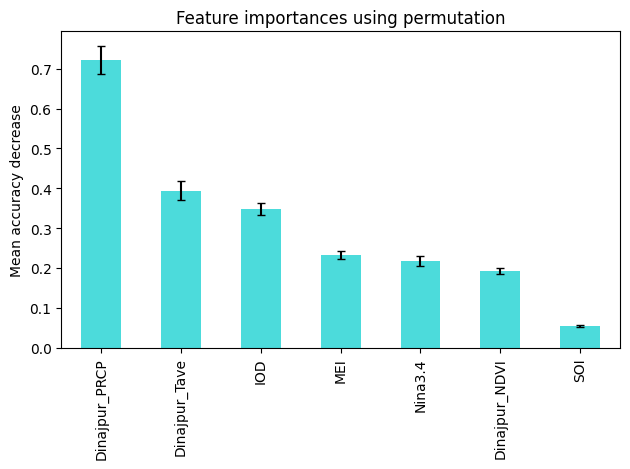

In [105]:
# Calculate upper and lower bounds
upper_bound = feature_importance_hybrid5 + feature_std_hybrid5[feature_importance_hybrid5.index]
lower_bound = feature_importance_hybrid5 - feature_std_hybrid5[feature_importance_hybrid5.index]

# Plot feature importances with error bars
fig, ax = plt.subplots()
feature_importance_hybrid5.plot.bar(yerr=feature_std_hybrid5[feature_importance_hybrid5.index], ax=ax, color='#00cccc', alpha=0.7, capsize=3)

# Adding markers for upper and lower bounds
plt.scatter(feature_importance_hybrid5.index, upper_bound, color='red', alpha=0)
plt.scatter(feature_importance_hybrid5.index, lower_bound, color='green', alpha=0)

ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# 5. Visualization

## Scatter plot: Training Stage: Actual vs. Predicted GWL(m)

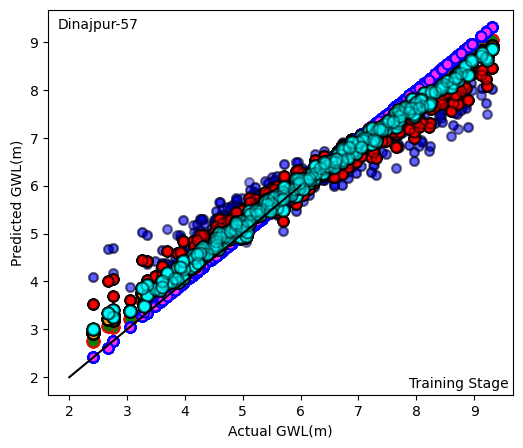

In [63]:
plt.figure(figsize=(6, 5))

plt.scatter(y_train, hybrid1_pred_train, color='blue', edgecolors='black', s=40, linewidths=1.5, alpha=0.04, label='Hybrid Model 1')
plt.scatter(y_train, hybrid2_pred_train, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.3, label='Hybrid Model 2')
plt.scatter(y_train, hybrid3_pred_train, color='red', edgecolors='black', s=50, linewidths=1.5,alpha=0.4, label='Hybrid Model 3')
plt.scatter(y_train, hybrid4_pred_train, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_train,  hybrid5_pred_train, color='#FE2EF7', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_train, hybrid6_pred_train, color='cyan', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')


plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Scatter plot: Validation Stage: Actual vs. Predicted GWL(m)

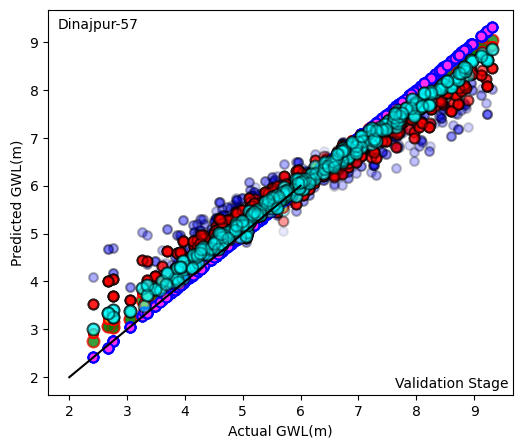

In [64]:
plt.figure(figsize=(6, 5))

plt.scatter(y_val, hybrid1_pred_val, color='blue', edgecolors='black', s=40, linewidths=1.5, alpha=0.09, label='Hybrid Model 1')
plt.scatter(y_val, hybrid2_pred_val, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.3,   label='Hybrid Model 2')
plt.scatter(y_val, hybrid3_pred_val, color='red', edgecolors='black', s=50, linewidths=1.5,alpha=0.4, label='Hybrid Model 3')
plt.scatter(y_val, hybrid4_pred_val, color='orange', edgecolors='red', s=40, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_val,  hybrid5_pred_val, color='#FE2EF7', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_val, hybrid6_pred_val, color='cyan', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')

plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Scatter plot: Test Stage: Actual vs. Predicted GWL(m)

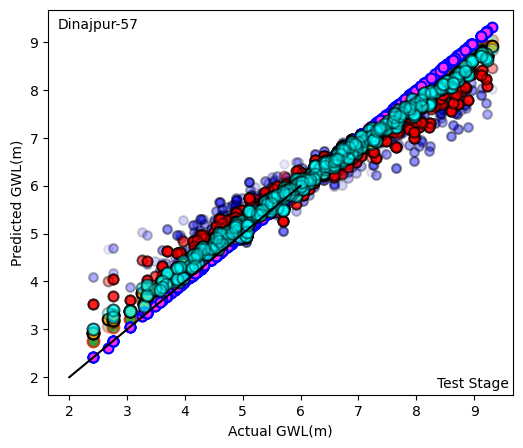

In [65]:
plt.figure(figsize=(6, 5))

plt.scatter(y_test, hybrid1_pred_test, color='blue', edgecolors='black', s=40, linewidths=1.5, alpha=0.09, label='Hybrid Model 1')
plt.scatter(y_test, hybrid2_pred_test,  color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.3,  label='Hybrid Model 2')
plt.scatter(y_test, hybrid3_pred_test, color='red', edgecolors='black', s=50, linewidths=1.5,alpha=0.4, label='Hybrid Model 3')
plt.scatter(y_test, hybrid4_pred_test, color='orange', edgecolors='black', s=70, linewidths=1.5,  label='Hybrid Model 4')
plt.scatter(y_test,  hybrid5_pred_test,color='#FE2EF7', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_test, hybrid6_pred_test, color='cyan', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')

plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Training Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

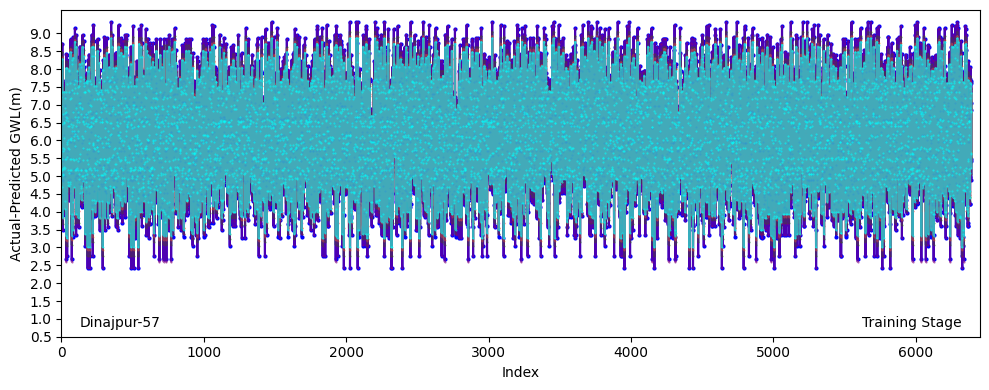

In [66]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_train = {
    'Hybrid Model 1': hybrid1_pred_train,
    'Hybrid Model 2': hybrid2_pred_train,
    'Hybrid Model 3': hybrid3_pred_train,
    'Hybrid Model 4': hybrid4_pred_train,
    'Hybrid Model 5': hybrid5_pred_train,
    'Hybrid Model 6': hybrid6_pred_train
}

actual_values = pd.DataFrame({'Actual Values': y_train.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2, color='blue')

# Plotting the predicted values for each model
for i, (model_name, predictions) in enumerate(models_predictions_train.items()):
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=.5, alpha=0.6, color=colors[i])

max_value = max(actual_values['Actual Values'].max(), np.max(np.array(list(models_predictions_train.values()))))
y_ticks = np.arange(0.5, max_value, step=0.5)
plt.yticks(y_ticks)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-57", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.xlim(0, 6450)
plt.tight_layout()
plt.show()

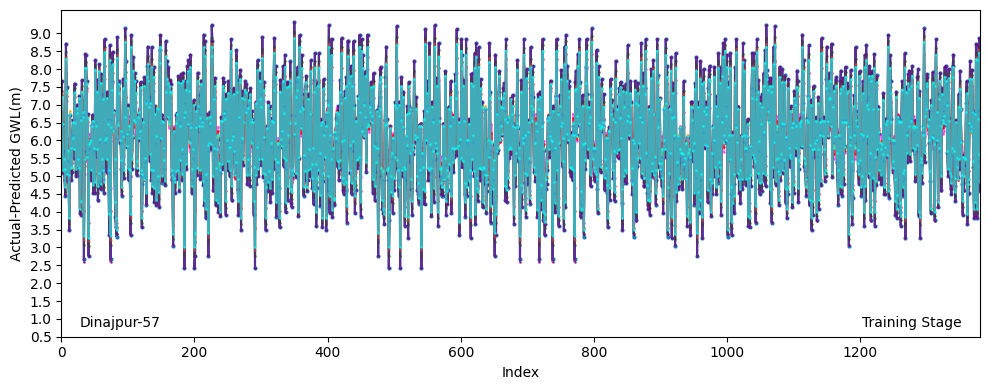

In [67]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_train = {
    'Hybrid Model 1': hybrid1_pred_train,
    'Hybrid Model 2': hybrid2_pred_train,
    'Hybrid Model 3': hybrid3_pred_train,
    'Hybrid Model 4': hybrid4_pred_train,
    'Hybrid Model 5': hybrid5_pred_train,
    'Hybrid Model 6': hybrid6_pred_train
}

actual_values = pd.DataFrame({'Actual Values': y_train.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for i, (model_name, predictions) in enumerate(models_predictions_train.items()):
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=1, alpha=0.6, color=colors[i])

max_value = max(actual_values['Actual Values'].max(), np.max(np.array(list(models_predictions_train.values()))))
y_ticks = np.arange(0.5, max_value, step=0.5)
plt.yticks(y_ticks)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-57", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Training Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

## Validation Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

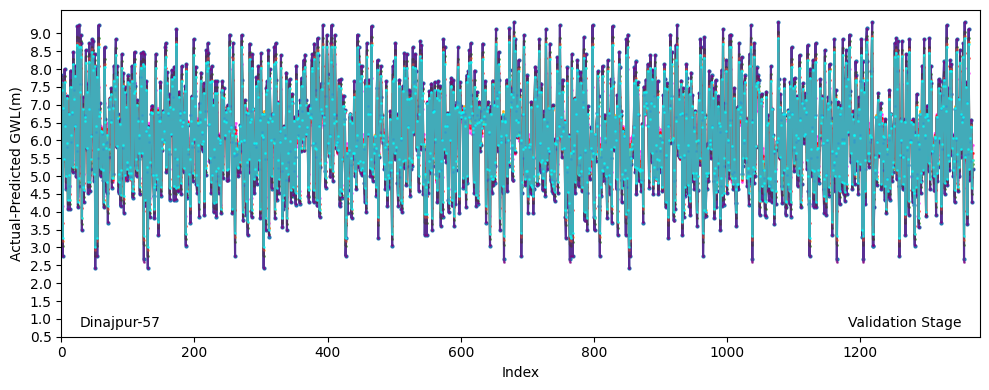

In [68]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_val = {
    'Hybrid Model 1': hybrid1_pred_val,
    'Hybrid Model 2': hybrid2_pred_val,
    'Hybrid Model 3': hybrid3_pred_val,
    'Hybrid Model 4': hybrid4_pred_val,
    'Hybrid Model 5': hybrid5_pred_val,
    'Hybrid Model 6': hybrid6_pred_val
}

actual_values = pd.DataFrame({'Actual Values': y_val.values})

plt.figure(figsize=(10, 4))

# Plotting the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plotting the predicted values for each model
for i, (model_name, predictions) in enumerate(models_predictions_val.items()):
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=1, alpha=0.6, color=colors[i])

max_value = max(actual_values['Actual Values'].max(), np.max(np.array(list(models_predictions_val.values()))))
y_ticks = np.arange(0.5, max_value, step=0.5)
plt.yticks(y_ticks)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-57", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

## Test Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

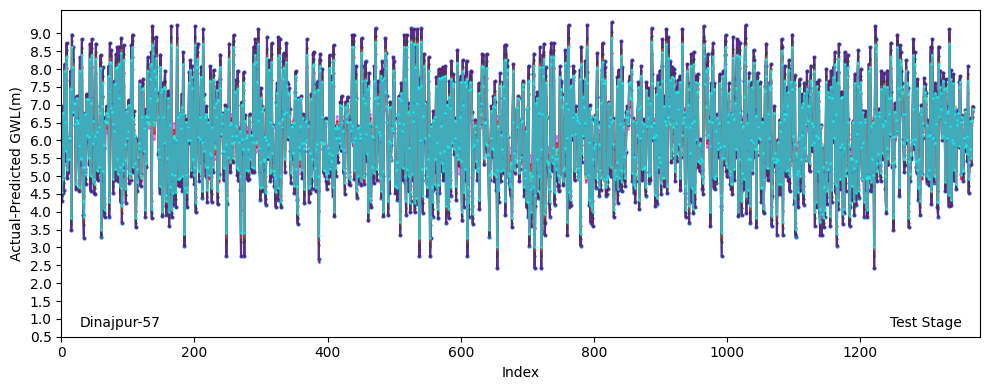

In [69]:
colors = ['#FE2EF7', 'green', 'red', 'orange', 'purple', 'cyan']

models_predictions_test = {
    'Hybrid Model 1': hybrid1_pred_test,
    'Hybrid Model 2': hybrid2_pred_test,
    'Hybrid Model 3': hybrid3_pred_test,
    'Hybrid Model 4': hybrid4_pred_test,
    'Hybrid Model 5': hybrid5_pred_test,
    'Hybrid Model 6': hybrid6_pred_test
}

actual_test = pd.DataFrame({'Actual test': y_test.values})

plt.figure(figsize=(10, 4))

# Plotting the actual test
plt.plot(actual_test.index, actual_test['Actual test'], label='Actual test', linestyle='-', marker='o', markersize=2)

# Plotting the predicted test for each model
for i, (model_name, predictions) in enumerate(models_predictions_test.items()):
    plt.plot(actual_test.index, predictions, label=model_name, linestyle='-', marker='o', markersize=1, alpha=0.6, color=colors[i])

max_testue = max(actual_test['Actual test'].max(), np.max(np.array(list(models_predictions_test.values()))))
y_ticks = np.arange(0.5, max_testue, step=0.5)
plt.yticks(y_ticks)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-57", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

# Distribution plot and Time series analysis
## Training stage

In [70]:
dates_train = df.loc[y_train.index, 'Date']

hybrid_train_data = {'Actual Values': y_train.values,
                    'Hybrid Model 1': hybrid1_pred_train,
                    'Hybrid Model 2': hybrid2_pred_train,
                    'Hybrid Model 3': hybrid3_pred_train,
                    'Hybrid Model 4': hybrid4_pred_train,
                    'Hybrid Model 5': hybrid5_pred_train,
                    'Hybrid Model 6': hybrid6_pred_train,
                    'Date': dates_train}

hybrid_train_df = pd.DataFrame(hybrid_train_data)

print("\nTraining Set:")
hybrid_train_df


Training Set:


,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
3063,7.2750,6.423722,7.103024,6.707536,6.993658,7.276161,6.969953,2001-05-22
1940,7.6550,6.369856,7.397898,6.798307,7.289714,7.659341,7.218651,1998-04-25
6848,6.4240,6.557221,6.452398,6.512781,6.470114,6.427483,6.473202,2011-10-02
3509,5.0875,5.357785,5.142430,5.267690,5.145938,5.088549,5.171202,2002-08-11
1612,5.6960,5.060592,5.569165,5.272408,5.530761,5.697369,5.485770,1997-06-01
...,...,...,...,...,...,...,...,...
5734,5.4150,5.861430,5.505404,5.712603,5.672377,5.413051,5.625138,2008-09-13
5191,6.8400,6.781584,6.829718,6.800996,6.829053,6.839861,6.815471,2007-03-20
5390,4.8800,5.742930,5.053649,5.455259,5.241436,4.878284,5.229305,2007-10-05
860,7.0425,6.421487,6.915830,6.628555,6.811663,7.043566,6.806973,1995-05-11


In [71]:
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_train_df

,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
0,4.322000,5.197963,4.497818,4.905941,4.683566,4.344222,4.674843,1993-01-02
1,4.322000,5.197963,4.497818,4.905941,4.683566,4.344222,4.674843,1993-01-03
2,4.322000,5.197963,4.497818,4.905941,4.683566,4.344222,4.674843,1993-01-05
3,4.322000,5.197963,4.497818,4.905941,4.683566,4.344222,4.674843,1993-01-06
4,4.322000,5.197963,4.497818,4.905941,4.683566,4.344222,4.674843,1993-01-07
...,...,...,...,...,...,...,...,...
6386,7.326667,6.879413,7.236471,7.028481,7.109928,7.323112,7.136059,2017-12-24
6387,7.326667,6.879413,7.236471,7.028481,7.109928,7.323112,7.136059,2017-12-26
6388,7.326667,6.879413,7.236471,7.028481,7.109928,7.323112,7.136059,2017-12-27
6389,7.326667,6.879413,7.236471,7.028481,7.109928,7.323112,7.136059,2017-12-29


## Violin Plot: Distribution of predicted vs actual values groundwater level

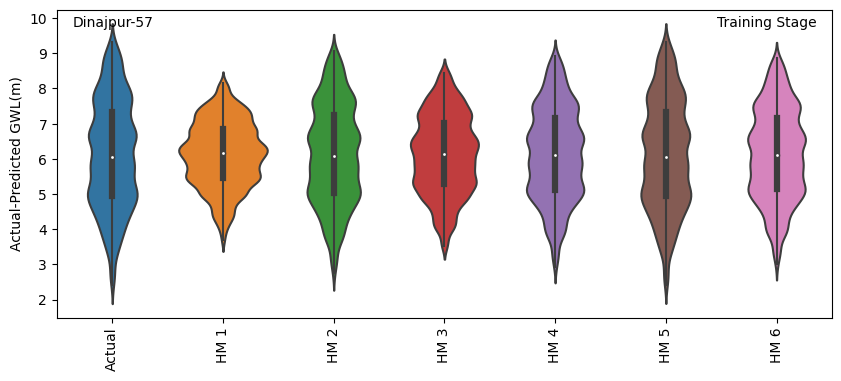

In [72]:
predictions_df = pd.DataFrame({
    'Actual': y_train.values,
    'HM 1': hybrid1_pred_train,
    'HM 2': hybrid2_pred_train,
    'HM 3': hybrid3_pred_train,
    'HM 4': hybrid4_pred_train,
    'HM 5': hybrid5_pred_train,
    'HM 6': hybrid6_pred_train
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)

plt.ylabel('Actual-Predicted GWL(m)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [73]:
hybrid_train_df.T

,0,1,2,3,4,5,6,7,8,9,...,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390
Actual Values,4.322,4.322,4.322,4.322,4.322,4.322,4.322,4.322,4.322,4.322,...,7.326667,7.326667,7.326667,7.326667,7.326667,7.326667,7.326667,7.326667,7.326667,7.326667
Hybrid Model 1,5.197963,5.197963,5.197963,5.197963,5.197963,5.197963,5.197963,5.197963,5.197963,5.197963,...,6.879413,6.879413,6.879413,6.879413,6.879413,6.879413,6.879413,6.879413,6.879413,6.879413
Hybrid Model 2,4.497818,4.497818,4.497818,4.497818,4.497818,4.497818,4.497818,4.497818,4.497818,4.497818,...,7.236471,7.236471,7.236471,7.236471,7.236471,7.236471,7.236471,7.236471,7.236471,7.236471
Hybrid Model 3,4.905941,4.905941,4.905941,4.905941,4.905941,4.905941,4.905941,4.905941,4.905941,4.905941,...,7.028481,7.028481,7.028481,7.028481,7.028481,7.028481,7.028481,7.028481,7.028481,7.028481
Hybrid Model 4,4.683566,4.683566,4.683566,4.683566,4.683566,4.683566,4.683566,4.683566,4.683566,4.683566,...,7.109928,7.109928,7.109928,7.109928,7.109928,7.109928,7.109928,7.109928,7.109928,7.109928
Hybrid Model 5,4.344222,4.344222,4.344222,4.344222,4.344222,4.344222,4.344222,4.344222,4.344222,4.344222,...,7.323112,7.323112,7.323112,7.323112,7.323112,7.323112,7.323112,7.323112,7.323112,7.323112
Hybrid Model 6,4.674843,4.674843,4.674843,4.674843,4.674843,4.674843,4.674843,4.674843,4.674843,4.674843,...,7.136059,7.136059,7.136059,7.136059,7.136059,7.136059,7.136059,7.136059,7.136059,7.136059
Date,1993-01-02 00:00:00,1993-01-03 00:00:00,1993-01-05 00:00:00,1993-01-06 00:00:00,1993-01-07 00:00:00,1993-01-08 00:00:00,1993-01-10 00:00:00,1993-01-11 00:00:00,1993-01-12 00:00:00,1993-01-14 00:00:00,...,2017-12-16 00:00:00,2017-12-18 00:00:00,2017-12-19 00:00:00,2017-12-20 00:00:00,2017-12-22 00:00:00,2017-12-24 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-29 00:00:00,2017-12-31 00:00:00


# Time series plots: predicted vs actual values groundwater level

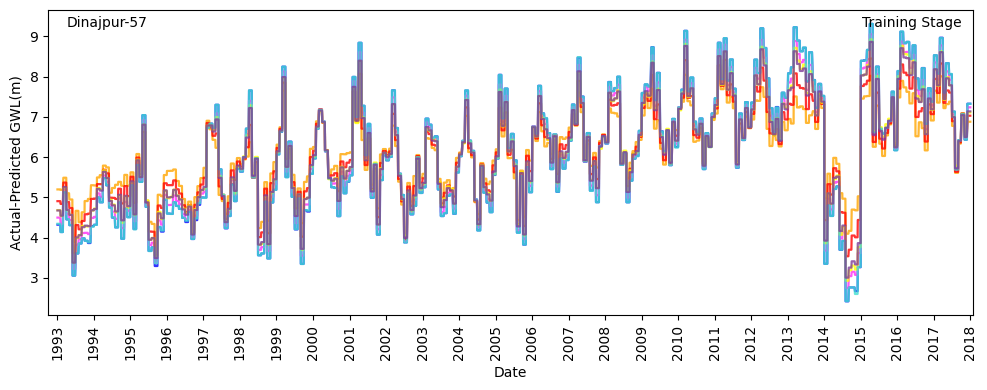

In [74]:
# Converting the 'Date' column to datetime format
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_train_df.columns[:-1]):
    plt.plot(hybrid_train_df['Date'], hybrid_train_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)

plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='black') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.88, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

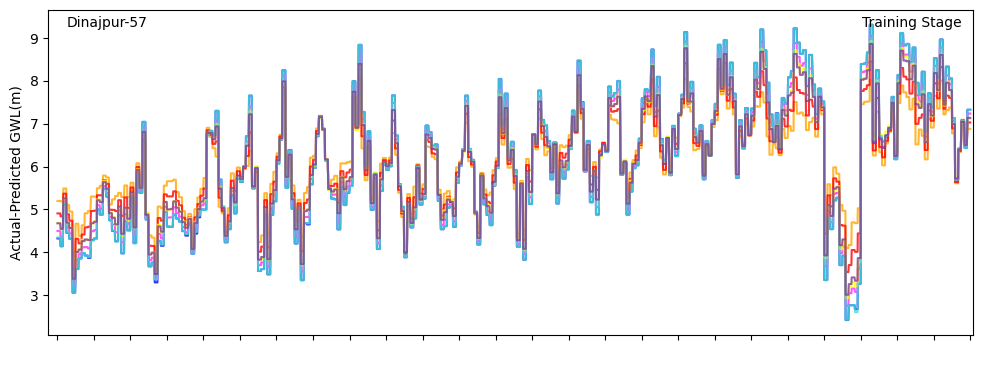

In [75]:
# Converting the 'Date' column to datetime format
hybrid_train_df['Date'] = pd.to_datetime(hybrid_train_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_train_df = hybrid_train_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_train_df = hybrid_train_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_train_df.columns[:-1]):
    plt.plot(hybrid_train_df['Date'], hybrid_train_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.5)

plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.88, 0.98, "Training Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution plot and Time series analysis
## Validation stage

In [76]:
dates_val = df.loc[y_val.index, 'Date']

hybrid_val_data = {'Actual Values': y_val.values,
                    'Hybrid Model 1': hybrid1_pred_val,
                    'Hybrid Model 2': hybrid2_pred_val,
                    'Hybrid Model 3': hybrid3_pred_val,
                    'Hybrid Model 4': hybrid4_pred_val,
                    'Hybrid Model 5': hybrid5_pred_val,
                    'Hybrid Model 6': hybrid6_pred_val,
                    'Date': dates_val}

hybrid_val_df = pd.DataFrame(hybrid_val_data)

print("\nValidation Set:")
hybrid_val_df


Validation Set:


,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
7609,7.820000,7.437753,7.738747,7.565299,7.574055,7.819027,7.630534,2013-11-01
4084,7.655000,7.025912,7.526597,7.235800,7.430578,7.654197,7.418783,2004-03-08
7920,2.762500,4.169218,3.043833,3.700359,3.189195,2.761816,3.255643,2014-09-08
8327,6.893333,6.811958,6.876810,6.839013,6.953526,6.892265,6.904888,2015-10-20
2716,5.465000,5.573362,5.486322,5.537296,5.453141,5.471618,5.481102,2000-06-09
...,...,...,...,...,...,...,...,...
5762,5.962000,6.149556,6.000792,6.087008,6.091479,5.964131,6.063463,2008-10-11
3254,5.430000,6.066708,5.556672,5.854417,5.724398,5.428322,5.702750,2001-11-29
4541,6.577500,5.985243,6.458769,6.182583,6.430293,6.578195,6.390119,2005-06-08
350,4.284000,5.301592,4.489789,4.962395,4.672777,4.267700,4.678232,1993-12-17


In [77]:
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_val_df

,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
0,4.322000,5.197963,4.497818,4.905941,4.683566,4.349036,4.674843,1993-01-09
1,4.322000,5.197963,4.497818,4.905941,4.683566,4.349036,4.674843,1993-01-15
2,4.322000,5.197963,4.497818,4.905941,4.683566,4.349036,4.674843,1993-01-18
3,4.322000,5.197963,4.497818,4.905941,4.683566,4.349036,4.674843,1993-01-20
4,4.322000,5.197963,4.497818,4.905941,4.683566,4.349036,4.674843,1993-01-24
...,...,...,...,...,...,...,...,...
1365,6.434000,6.619331,6.471860,6.557523,6.502839,6.432245,6.500260,2017-11-10
1366,7.326667,6.879413,7.236471,7.028481,7.109928,7.324763,7.136059,2017-12-17
1367,7.326667,6.879413,7.236471,7.028481,7.109928,7.324763,7.136059,2017-12-21
1368,7.326667,6.879413,7.236471,7.028481,7.109928,7.324763,7.136059,2017-12-23


## Violin Plot: Distribution of predicted vs actual values groundwater level

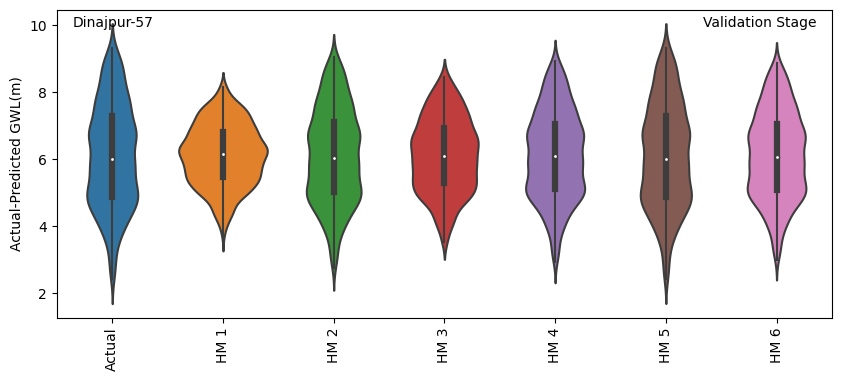

In [78]:
predictions_df = pd.DataFrame({
    'Actual': y_val.values,
    'HM 1': hybrid1_pred_val,
    'HM 2': hybrid2_pred_val,
    'HM 3': hybrid3_pred_val,
    'HM 4': hybrid4_pred_val,
    'HM 5': hybrid5_pred_val,
    'HM 6': hybrid6_pred_val
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)

plt.ylabel('Actual-Predicted GWL(m)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [79]:
hybrid_val_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,4.322,4.322,4.322,4.322,4.322,4.14,4.14,4.14,4.14,4.14,...,7.05,7.05,7.05,6.434,6.434,6.434,7.326667,7.326667,7.326667,7.326667
Hybrid Model 1,5.197963,5.197963,5.197963,5.197963,5.197963,5.187384,5.187384,5.187384,5.187384,5.187384,...,7.09222,7.09222,7.09222,6.619331,6.619331,6.619331,6.879413,6.879413,6.879413,6.879413
Hybrid Model 2,4.497818,4.497818,4.497818,4.497818,4.497818,4.347743,4.347743,4.347743,4.347743,4.347743,...,7.058624,7.058624,7.058624,6.47186,6.47186,6.47186,7.236471,7.236471,7.236471,7.236471
Hybrid Model 3,4.905941,4.905941,4.905941,4.905941,4.905941,4.838124,4.838124,4.838124,4.838124,4.838124,...,7.078153,7.078153,7.078153,6.557523,6.557523,6.557523,7.028481,7.028481,7.028481,7.028481
Hybrid Model 4,4.683566,4.683566,4.683566,4.683566,4.683566,4.533087,4.533087,4.533087,4.533087,4.533087,...,7.009033,7.009033,7.009033,6.502839,6.502839,6.502839,7.109928,7.109928,7.109928,7.109928
Hybrid Model 5,4.349036,4.349036,4.349036,4.349036,4.349036,4.138432,4.138432,4.138432,4.138432,4.138432,...,7.071726,7.071726,7.071726,6.432245,6.432245,6.432245,7.324763,7.324763,7.324763,7.324763
Hybrid Model 6,4.674843,4.674843,4.674843,4.674843,4.674843,4.545139,4.545139,4.545139,4.545139,4.545139,...,7.040263,7.040263,7.040263,6.50026,6.50026,6.50026,7.136059,7.136059,7.136059,7.136059
Date,1993-01-09 00:00:00,1993-01-15 00:00:00,1993-01-18 00:00:00,1993-01-20 00:00:00,1993-01-24 00:00:00,1993-02-07 00:00:00,1993-02-11 00:00:00,1993-02-18 00:00:00,1993-02-20 00:00:00,1993-02-26 00:00:00,...,2017-10-13 00:00:00,2017-10-14 00:00:00,2017-10-25 00:00:00,2017-11-01 00:00:00,2017-11-02 00:00:00,2017-11-10 00:00:00,2017-12-17 00:00:00,2017-12-21 00:00:00,2017-12-23 00:00:00,2017-12-25 00:00:00


# Time series plots: predicted vs actual values groundwater level

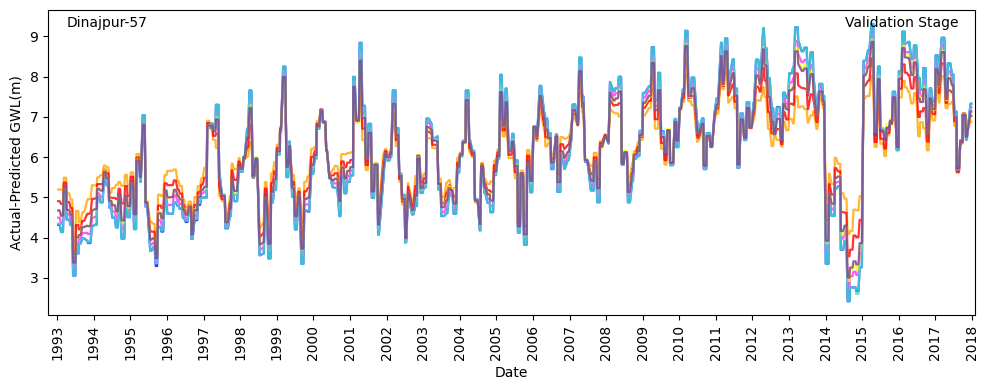

In [80]:
# Converting the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_val_df.columns[:-1]):
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)

plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='black') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.86, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

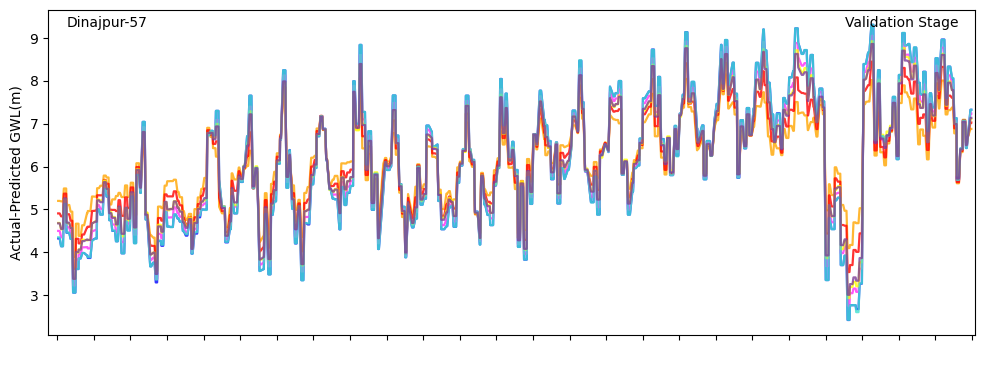

In [81]:
# Converting the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_val_df.columns[:-1]):
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)


plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.86, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution plot and Time series analysis
## Test stage

In [82]:
dates_test = df.loc[y_test.index, 'Date']

hybrid_test_data = {'Actual Values': y_test.values,
                    'Hybrid Model 1': hybrid1_pred_test,
                    'Hybrid Model 2': hybrid2_pred_test,
                    'Hybrid Model 3': hybrid3_pred_test,
                    'Hybrid Model 4': hybrid4_pred_test,
                    'Hybrid Model 5': hybrid5_pred_test,
                    'Hybrid Model 6': hybrid6_pred_test,
                    'Date': dates_test}

hybrid_test_df = pd.DataFrame(hybrid_test_data)

print("\nTest Set:")
hybrid_test_df


Test Set:


,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
4710,5.752000,6.175876,5.836911,6.034526,5.867141,5.753397,5.893263,2005-11-24
131,4.310000,4.947661,4.437689,4.735120,4.567520,4.310102,4.565990,1993-05-12
2802,4.533333,5.466600,4.717908,5.155446,4.929298,4.537272,4.913103,2000-09-03
4472,6.968000,6.514047,6.877783,6.665387,6.764506,6.962036,6.776766,2005-03-31
1108,4.598333,5.657379,4.810141,5.304360,4.979481,4.596600,5.000979,1996-01-14
...,...,...,...,...,...,...,...,...
2948,5.548000,6.119236,5.663375,5.928778,5.741531,5.545424,5.754197,2001-01-27
6394,6.620000,6.411553,6.578286,6.481037,6.579260,6.619913,6.556986,2010-07-05
1746,5.326667,5.841112,5.429582,5.669623,5.460680,5.312331,5.495707,1997-10-13
5820,6.652500,6.428253,6.607460,6.502953,6.537741,6.657489,6.552548,2008-12-08


In [83]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)
hybrid_test_df

,Actual Values,Hybrid Model 1,Hybrid Model 2,Hybrid Model 3,Hybrid Model 4,Hybrid Model 5,Hybrid Model 6,Date
0,4.322000,5.197963,4.497818,4.905941,4.683566,4.346193,4.674843,1993-01-01
1,4.322000,5.197963,4.497818,4.905941,4.683566,4.346193,4.674843,1993-01-04
2,4.322000,5.197963,4.497818,4.905941,4.683566,4.346193,4.674843,1993-01-13
3,4.322000,5.197963,4.497818,4.905941,4.683566,4.346193,4.674843,1993-01-27
4,4.322000,5.197963,4.497818,4.905941,4.683566,4.346193,4.674843,1993-01-31
...,...,...,...,...,...,...,...,...
1365,6.434000,6.619331,6.471860,6.557523,6.502839,6.432141,6.500260,2017-11-30
1366,7.326667,6.879413,7.236471,7.028481,7.109928,7.324509,7.136059,2017-12-07
1367,7.326667,6.879413,7.236471,7.028481,7.109928,7.324509,7.136059,2017-12-10
1368,7.326667,6.879413,7.236471,7.028481,7.109928,7.324509,7.136059,2017-12-28


# Violin Plot: Distribution of Predicted vs Actual Values

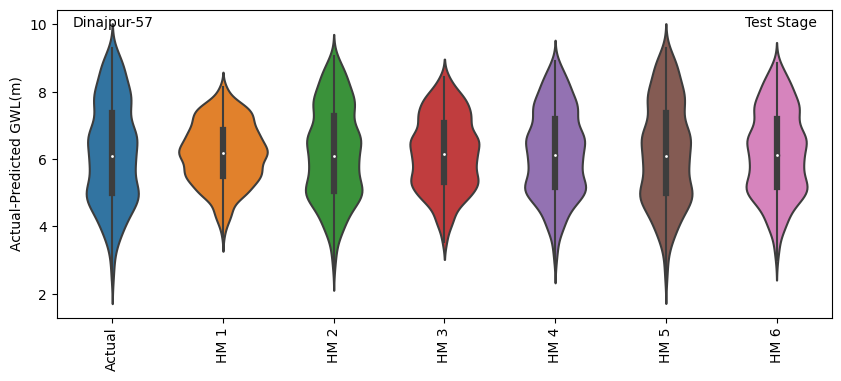

In [84]:
# Combining the predicted values into a single DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'HM 1': hybrid1_pred_test,
    'HM 2': hybrid2_pred_test,
    'HM 3': hybrid3_pred_test,
    'HM 4': hybrid4_pred_test,
    'HM 5': hybrid5_pred_test,
    'HM 6': hybrid6_pred_test
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)

plt.ylabel('Actual-Predicted GWL(m)')
plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [85]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_test_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,4.322,4.322,4.322,4.322,4.322,4.14,4.14,4.14,4.14,4.14,...,6.434,6.434,6.434,6.434,6.434,6.434,7.326667,7.326667,7.326667,7.326667
Hybrid Model 1,5.197963,5.197963,5.197963,5.197963,5.197963,5.187384,5.187384,5.187384,5.187384,5.187384,...,6.619331,6.619331,6.619331,6.619331,6.619331,6.619331,6.879413,6.879413,6.879413,6.879413
Hybrid Model 2,4.497818,4.497818,4.497818,4.497818,4.497818,4.347743,4.347743,4.347743,4.347743,4.347743,...,6.47186,6.47186,6.47186,6.47186,6.47186,6.47186,7.236471,7.236471,7.236471,7.236471
Hybrid Model 3,4.905941,4.905941,4.905941,4.905941,4.905941,4.838124,4.838124,4.838124,4.838124,4.838124,...,6.557523,6.557523,6.557523,6.557523,6.557523,6.557523,7.028481,7.028481,7.028481,7.028481
Hybrid Model 4,4.683566,4.683566,4.683566,4.683566,4.683566,4.533087,4.533087,4.533087,4.533087,4.533087,...,6.502839,6.502839,6.502839,6.502839,6.502839,6.502839,7.109928,7.109928,7.109928,7.109928
Hybrid Model 5,4.346193,4.346193,4.346193,4.346193,4.346193,4.138372,4.138372,4.138372,4.138372,4.138372,...,6.432141,6.432141,6.432141,6.432141,6.432141,6.432141,7.324509,7.324509,7.324509,7.324509
Hybrid Model 6,4.674843,4.674843,4.674843,4.674843,4.674843,4.545139,4.545139,4.545139,4.545139,4.545139,...,6.50026,6.50026,6.50026,6.50026,6.50026,6.50026,7.136059,7.136059,7.136059,7.136059
Date,1993-01-01 00:00:00,1993-01-04 00:00:00,1993-01-13 00:00:00,1993-01-27 00:00:00,1993-01-31 00:00:00,1993-02-01 00:00:00,1993-02-03 00:00:00,1993-02-09 00:00:00,1993-02-17 00:00:00,1993-02-21 00:00:00,...,2017-11-20 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-07 00:00:00,2017-12-10 00:00:00,2017-12-28 00:00:00,2017-12-30 00:00:00


# Time series plots: Test stage

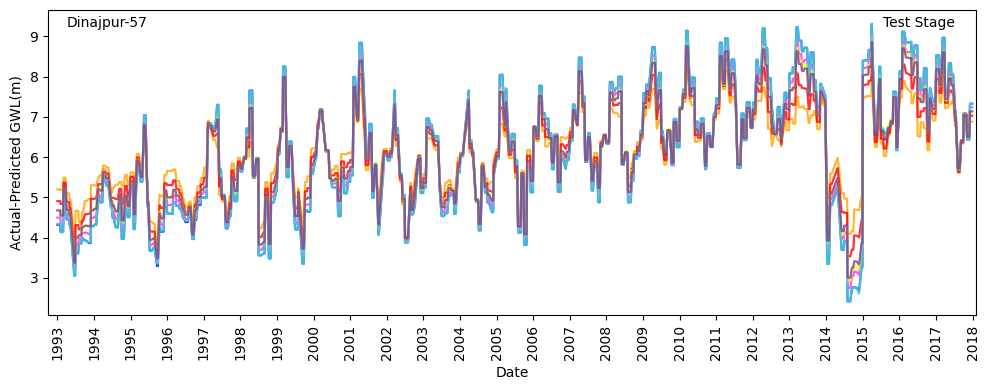

In [86]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_test_df.columns[:-1]):
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)

plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='black') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

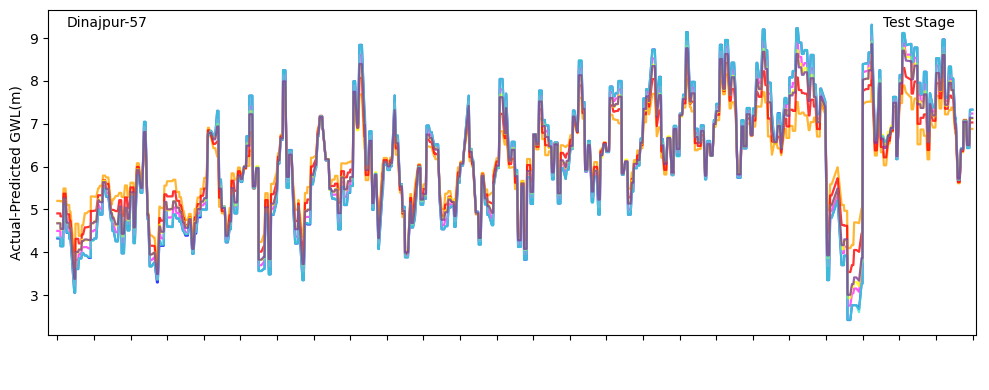

In [87]:
# Converting the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sorting the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Creating a time series plot
plt.figure(figsize=(10, 4))

# Define a list of colors (you can change these to your preferred colors)
colors = ['blue', 'orange','#FE2EF7', 'red', 'yellow', '#40E0D0', '#7D3C98', 'purple']

# Iterating over the hybrid models and plot their predictions with different colors
for i, col in enumerate(hybrid_test_df.columns[:-1]):
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col, color=colors[i], alpha=0.8, linewidth=1.6)

plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98, "Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Density Plot: Training stage

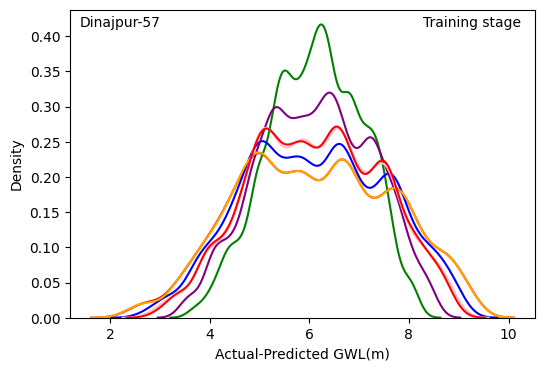

In [88]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_train.values, color='red', label='Hybrid Model 1')
sns.kdeplot(hybrid1_pred_train, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_train, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_train, color='purple', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_train, color='pink', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_train, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_train, color='red', label='Hybrid Model 6')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.76, 0.98, "Training stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Validation stage

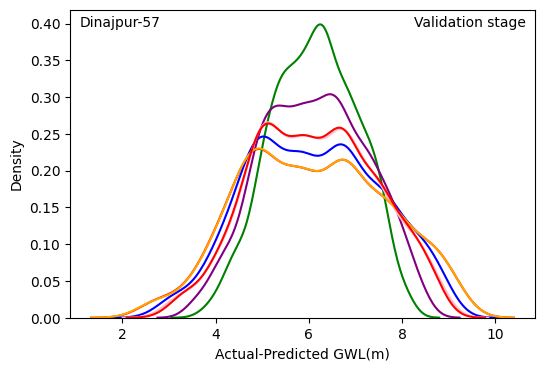

In [89]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_val.values, color='red', label='Hybrid Model 1')
sns.kdeplot(hybrid1_pred_val, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_val, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_val, color='purple', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_val, color='pink', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_val, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_val, color='red', label='Hybrid Model 6')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.74, 0.98, "Validation stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Test stage

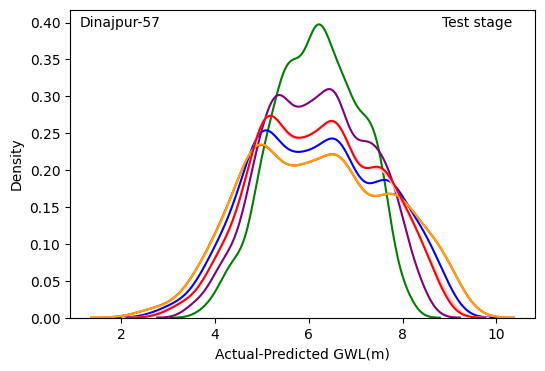

In [90]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_test.values, color='red', label='Hybrid Model 1')
sns.kdeplot(hybrid1_pred_test, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_test, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_test, color='purple', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_test, color='pink', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_test, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_test, color='red', label='Hybrid Model 6')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-57", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.80, 0.98, "Test stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()